NZ Locations Explained

cr: Cape Reinga (-34.25, 172.25)

mg: Mauraki Gulf (-36.75, 175.250

bop: Bay of Plenty (-37.25, 176.75)

r: Raglan (-37.75, 174.750

t: Taranaki (-38.75, 174.25)

cs: Cook Strait (-40.75, 174.25)

w: Wairarapa (-41.25, 176.25)

ci: Chatham Island (-43.75 -176.75)

bp: Bank Peninsula (-43.75, 173.25)

f: Fiordland (-44.25, 167.25)

op: Otago Peninsula (-45.75, 170.75)

si: Stewart Island (-47.25, 167.75)

In [7]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

!cp -r "/gdrive/MyDrive/SSTA NZ" "/content/"
!cp -r "/gdrive/MyDrive/SSTA Non NZ" "/content/"

Mounted at /gdrive


In [34]:
import glob
import os

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time

import matplotlib.pyplot as plt

import pandas as pd
from IPython.display import display

dir_path = '/content/SSTA NZ'
nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    nz[filename] = array

dir_path = '/content/SSTA Non NZ'
non_nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    non_nz[filename] = array

dir_path = '/content/SSTA NZ'

# Merge the two dictionaries into one predictor dictionary.
predictors = {}
predictors.update(nz)
predictors.update(non_nz)

In [53]:
from scipy.stats import shapiro

# Shapiro-Wilk Test (1965)
for loc in sorted(list(nz.keys())):
    print('{}, mean: {:.4f}, std: {:.4f}'.format(loc.upper(), np.mean(nz[loc]), np.std(nz[loc])))
    stat, p = shapiro(nz[loc])
    if p > 0.05:
        print("The array is normally distributed at a significance level of 0.05.")
    else:
        print("The array is not normally distributed at a significance level of 0.05.")

BOP, mean: 0.0539, std: 0.8376
The array is normally distributed at a significance level of 0.05.
BP, mean: -0.0291, std: 0.8573
The array is not normally distributed at a significance level of 0.05.
CI, mean: -0.0170, std: 0.9278
The array is not normally distributed at a significance level of 0.05.
CR, mean: 0.0652, std: 0.8237
The array is not normally distributed at a significance level of 0.05.
CS, mean: 0.0286, std: 0.6657
The array is normally distributed at a significance level of 0.05.
F, mean: 0.0519, std: 0.9631
The array is not normally distributed at a significance level of 0.05.
MG, mean: 0.0490, std: 0.8536
The array is normally distributed at a significance level of 0.05.
OP, mean: -0.0091, std: 0.7822
The array is not normally distributed at a significance level of 0.05.
R, mean: 0.0792, std: 0.8447
The array is not normally distributed at a significance level of 0.05.
SI, mean: 0.0053, std: 0.8000
The array is not normally distributed at a significance level of 0.05.


Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7263537
Training Model 1
Epoch [20/400], Avg Loss: 4.7266,  Val MSE: 0.2793
Epoch [40/400], Avg Loss: 0.9383,  Val MSE: 0.2511
Epoch [60/400], Avg Loss: 0.5491,  Val MSE: 0.2302
Epoch [80/400], Avg Loss: 0.4829,  Val MSE: 0.2262
Epoch [100/400], Avg Loss: 0.4476,  Val MSE: 0.2246
Epoch [120/400], Avg Loss: 0.4218,  Val MSE: 0.2240
Epoch [140/400], Avg Loss: 0.4041,  Val MSE: 0.2248
Epoch [160/400], Avg Loss: 0.3908,  Val MSE: 0.2259
Epoch [180/400], Avg Loss: 0.3807,  Val MSE: 0.2266
Epoch [200/400], Avg Loss: 0.3727,  Val MSE: 0.2271
Epoch [220/400], Avg Loss: 0.3660,  Val MSE: 0.2274
Epoch [240/400], Avg Loss: 0.3600,  Val MSE: 0.2275
Epoch [260/400], Avg Loss: 0.3550,  Val MSE: 0.2278
Epoch [280/400], Avg Loss: 0.3508,  Val MSE: 0.2279
Epoch [300/400], Avg Loss: 0.3475,  Val MSE: 0.2279
Epoch [320/400], Avg Loss: 0.3443,  Val MSE: 0.2280
Epoch [340/400], Avg Loss: 0.3418,  Val MSE: 0.2281
Epoch [360/400], Avg Loss: 0.3400,  Val

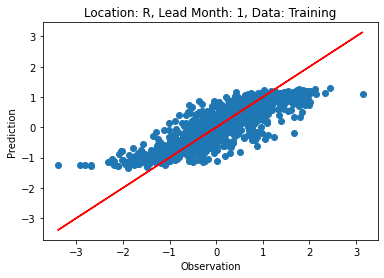

Training Model 2
Epoch [20/400], Avg Loss: 4.7086,  Val MSE: 0.2723
Epoch [40/400], Avg Loss: 0.9473,  Val MSE: 0.2492
Epoch [60/400], Avg Loss: 0.5512,  Val MSE: 0.2293
Epoch [80/400], Avg Loss: 0.4705,  Val MSE: 0.2251
Epoch [100/400], Avg Loss: 0.4270,  Val MSE: 0.2229
Epoch [120/400], Avg Loss: 0.4057,  Val MSE: 0.2224
Epoch [140/400], Avg Loss: 0.3920,  Val MSE: 0.2231
Epoch [160/400], Avg Loss: 0.3829,  Val MSE: 0.2238
Epoch [180/400], Avg Loss: 0.3755,  Val MSE: 0.2245
Epoch [200/400], Avg Loss: 0.3688,  Val MSE: 0.2247
Epoch [220/400], Avg Loss: 0.3639,  Val MSE: 0.2249
Epoch [240/400], Avg Loss: 0.3600,  Val MSE: 0.2248
Epoch [260/400], Avg Loss: 0.3569,  Val MSE: 0.2248
Epoch [280/400], Avg Loss: 0.3550,  Val MSE: 0.2250
Epoch [300/400], Avg Loss: 0.3530,  Val MSE: 0.2251
Epoch [320/400], Avg Loss: 0.3511,  Val MSE: 0.2254
Epoch [340/400], Avg Loss: 0.3495,  Val MSE: 0.2254
Epoch [360/400], Avg Loss: 0.3483,  Val MSE: 0.2256
Epoch [380/400], Avg Loss: 0.3470,  Val MSE: 0.2258

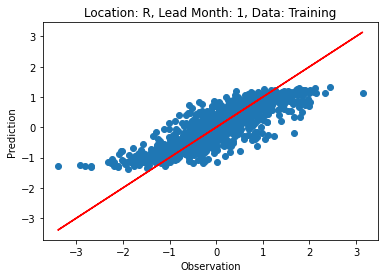

Training Model 3
Epoch [20/400], Avg Loss: 4.7138,  Val MSE: 0.2789
Epoch [40/400], Avg Loss: 0.9094,  Val MSE: 0.2471
Epoch [60/400], Avg Loss: 0.5419,  Val MSE: 0.2296
Epoch [80/400], Avg Loss: 0.4728,  Val MSE: 0.2254
Epoch [100/400], Avg Loss: 0.4354,  Val MSE: 0.2226
Epoch [120/400], Avg Loss: 0.4154,  Val MSE: 0.2212
Epoch [140/400], Avg Loss: 0.4025,  Val MSE: 0.2210
Epoch [160/400], Avg Loss: 0.3925,  Val MSE: 0.2220
Epoch [180/400], Avg Loss: 0.3840,  Val MSE: 0.2228
Epoch [200/400], Avg Loss: 0.3757,  Val MSE: 0.2234
Epoch [220/400], Avg Loss: 0.3686,  Val MSE: 0.2239
Epoch [240/400], Avg Loss: 0.3625,  Val MSE: 0.2246
Epoch [260/400], Avg Loss: 0.3567,  Val MSE: 0.2251
Epoch [280/400], Avg Loss: 0.3511,  Val MSE: 0.2255
Epoch [300/400], Avg Loss: 0.3471,  Val MSE: 0.2258
Epoch [320/400], Avg Loss: 0.3436,  Val MSE: 0.2262
Epoch [340/400], Avg Loss: 0.3401,  Val MSE: 0.2267
Epoch [360/400], Avg Loss: 0.3368,  Val MSE: 0.2270
Epoch [380/400], Avg Loss: 0.3345,  Val MSE: 0.2275

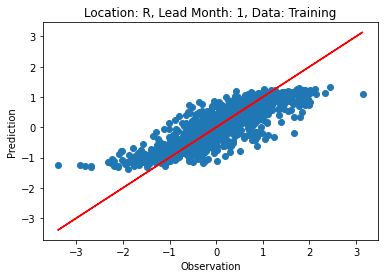

Training Model 4
Epoch [20/400], Avg Loss: 4.7384,  Val MSE: 0.2775
Epoch [40/400], Avg Loss: 0.9694,  Val MSE: 0.2487
Epoch [60/400], Avg Loss: 0.5649,  Val MSE: 0.2290
Epoch [80/400], Avg Loss: 0.4869,  Val MSE: 0.2246
Epoch [100/400], Avg Loss: 0.4479,  Val MSE: 0.2231
Epoch [120/400], Avg Loss: 0.4210,  Val MSE: 0.2230
Epoch [140/400], Avg Loss: 0.4020,  Val MSE: 0.2231
Epoch [160/400], Avg Loss: 0.3872,  Val MSE: 0.2244
Epoch [180/400], Avg Loss: 0.3760,  Val MSE: 0.2255
Epoch [200/400], Avg Loss: 0.3673,  Val MSE: 0.2262
Epoch [220/400], Avg Loss: 0.3613,  Val MSE: 0.2266
Epoch [240/400], Avg Loss: 0.3562,  Val MSE: 0.2271
Epoch [260/400], Avg Loss: 0.3519,  Val MSE: 0.2275
Epoch [280/400], Avg Loss: 0.3481,  Val MSE: 0.2278
Epoch [300/400], Avg Loss: 0.3441,  Val MSE: 0.2282
Epoch [320/400], Avg Loss: 0.3410,  Val MSE: 0.2286
Epoch [340/400], Avg Loss: 0.3378,  Val MSE: 0.2288
Epoch [360/400], Avg Loss: 0.3340,  Val MSE: 0.2291
Epoch [380/400], Avg Loss: 0.3303,  Val MSE: 0.2293

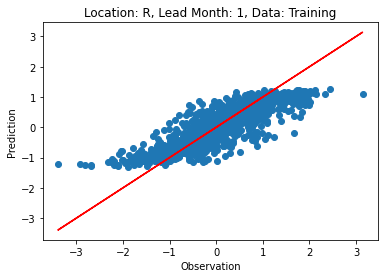

Training Model 5
Epoch [20/400], Avg Loss: 4.7993,  Val MSE: 0.2812
Epoch [40/400], Avg Loss: 0.9601,  Val MSE: 0.2514
Epoch [60/400], Avg Loss: 0.5497,  Val MSE: 0.2283
Epoch [80/400], Avg Loss: 0.4664,  Val MSE: 0.2226
Epoch [100/400], Avg Loss: 0.4305,  Val MSE: 0.2202
Epoch [120/400], Avg Loss: 0.4090,  Val MSE: 0.2207
Epoch [140/400], Avg Loss: 0.3948,  Val MSE: 0.2209
Epoch [160/400], Avg Loss: 0.3846,  Val MSE: 0.2214
Epoch [180/400], Avg Loss: 0.3769,  Val MSE: 0.2226
Epoch [200/400], Avg Loss: 0.3718,  Val MSE: 0.2235
Epoch [220/400], Avg Loss: 0.3673,  Val MSE: 0.2237
Epoch [240/400], Avg Loss: 0.3629,  Val MSE: 0.2243
Epoch [260/400], Avg Loss: 0.3589,  Val MSE: 0.2247
Epoch [280/400], Avg Loss: 0.3557,  Val MSE: 0.2248
Epoch [300/400], Avg Loss: 0.3535,  Val MSE: 0.2251
Epoch [320/400], Avg Loss: 0.3518,  Val MSE: 0.2252
Epoch [340/400], Avg Loss: 0.3504,  Val MSE: 0.2254
Epoch [360/400], Avg Loss: 0.3494,  Val MSE: 0.2257
Epoch [380/400], Avg Loss: 0.3482,  Val MSE: 0.2259

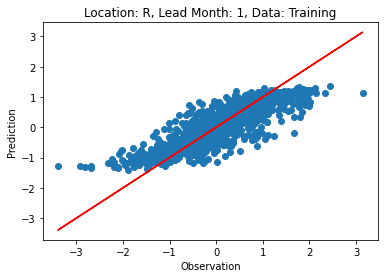

Location: R
Persistence MSE: 0.2377
Test MSE: 0.2275
Persist CSI: 0.5158
Persist CSI 80: 0.6259
Test CSI: 0.2055
Test CSI 80: 0.5859


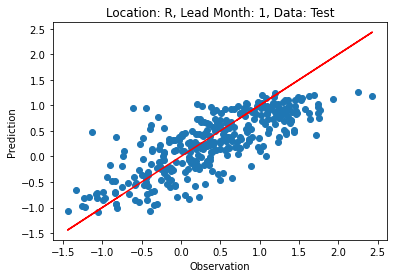

Location: CS
90th Threshold: 0.9103391
80th Threshold: 0.5539276
Training Model 1
Epoch [20/400], Avg Loss: 4.5854,  Val MSE: 0.2100
Epoch [40/400], Avg Loss: 0.7740,  Val MSE: 0.1883
Epoch [60/400], Avg Loss: 0.3851,  Val MSE: 0.1611
Epoch [80/400], Avg Loss: 0.3181,  Val MSE: 0.1440
Epoch [100/400], Avg Loss: 0.2909,  Val MSE: 0.1322
Epoch [120/400], Avg Loss: 0.2766,  Val MSE: 0.1260
Epoch [140/400], Avg Loss: 0.2676,  Val MSE: 0.1240
Epoch [160/400], Avg Loss: 0.2592,  Val MSE: 0.1235
Epoch [180/400], Avg Loss: 0.2507,  Val MSE: 0.1233
Epoch [200/400], Avg Loss: 0.2441,  Val MSE: 0.1231
Epoch [220/400], Avg Loss: 0.2393,  Val MSE: 0.1230
Epoch [240/400], Avg Loss: 0.2358,  Val MSE: 0.1229
Epoch [260/400], Avg Loss: 0.2331,  Val MSE: 0.1229
Epoch [280/400], Avg Loss: 0.2302,  Val MSE: 0.1230
Epoch [300/400], Avg Loss: 0.2269,  Val MSE: 0.1231
Epoch [320/400], Avg Loss: 0.2232,  Val MSE: 0.1233
Epoch [340/400], Avg Loss: 0.2197,  Val MSE: 0.1234
Epoch [360/400], Avg Loss: 0.2165,  Va

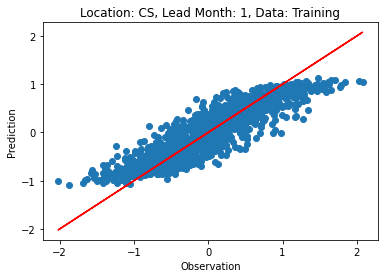

Training Model 2
Epoch [20/400], Avg Loss: 4.6082,  Val MSE: 0.2065
Epoch [40/400], Avg Loss: 0.8284,  Val MSE: 0.1950
Epoch [60/400], Avg Loss: 0.4215,  Val MSE: 0.1673
Epoch [80/400], Avg Loss: 0.3487,  Val MSE: 0.1486
Epoch [100/400], Avg Loss: 0.3122,  Val MSE: 0.1361
Epoch [120/400], Avg Loss: 0.2891,  Val MSE: 0.1281
Epoch [140/400], Avg Loss: 0.2725,  Val MSE: 0.1242
Epoch [160/400], Avg Loss: 0.2605,  Val MSE: 0.1229
Epoch [180/400], Avg Loss: 0.2510,  Val MSE: 0.1225
Epoch [200/400], Avg Loss: 0.2431,  Val MSE: 0.1223
Epoch [220/400], Avg Loss: 0.2366,  Val MSE: 0.1221
Epoch [240/400], Avg Loss: 0.2320,  Val MSE: 0.1219
Epoch [260/400], Avg Loss: 0.2281,  Val MSE: 0.1219
Epoch [280/400], Avg Loss: 0.2254,  Val MSE: 0.1220
Epoch [300/400], Avg Loss: 0.2230,  Val MSE: 0.1221
Epoch [320/400], Avg Loss: 0.2207,  Val MSE: 0.1223
Epoch [340/400], Avg Loss: 0.2185,  Val MSE: 0.1224
Epoch [360/400], Avg Loss: 0.2161,  Val MSE: 0.1226
Epoch [380/400], Avg Loss: 0.2135,  Val MSE: 0.1227

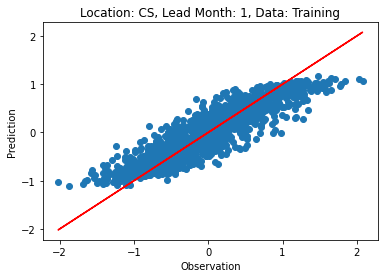

Training Model 3
Epoch [20/400], Avg Loss: 4.5984,  Val MSE: 0.2084
Epoch [40/400], Avg Loss: 0.8607,  Val MSE: 0.1980
Epoch [60/400], Avg Loss: 0.4252,  Val MSE: 0.1656
Epoch [80/400], Avg Loss: 0.3371,  Val MSE: 0.1500
Epoch [100/400], Avg Loss: 0.2941,  Val MSE: 0.1363
Epoch [120/400], Avg Loss: 0.2670,  Val MSE: 0.1280
Epoch [140/400], Avg Loss: 0.2514,  Val MSE: 0.1247
Epoch [160/400], Avg Loss: 0.2401,  Val MSE: 0.1239
Epoch [180/400], Avg Loss: 0.2321,  Val MSE: 0.1235
Epoch [200/400], Avg Loss: 0.2271,  Val MSE: 0.1233
Epoch [220/400], Avg Loss: 0.2241,  Val MSE: 0.1231
Epoch [240/400], Avg Loss: 0.2222,  Val MSE: 0.1232
Epoch [260/400], Avg Loss: 0.2205,  Val MSE: 0.1234
Epoch [280/400], Avg Loss: 0.2191,  Val MSE: 0.1235
Epoch [300/400], Avg Loss: 0.2176,  Val MSE: 0.1237
Epoch [320/400], Avg Loss: 0.2159,  Val MSE: 0.1238
Epoch [340/400], Avg Loss: 0.2138,  Val MSE: 0.1240
Epoch [360/400], Avg Loss: 0.2114,  Val MSE: 0.1240
Epoch [380/400], Avg Loss: 0.2093,  Val MSE: 0.1241

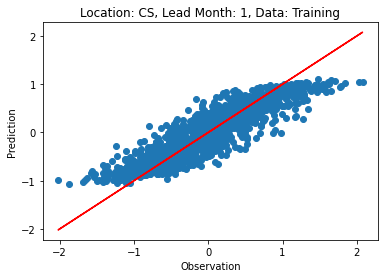

Training Model 4
Epoch [20/400], Avg Loss: 4.6018,  Val MSE: 0.2034
Epoch [40/400], Avg Loss: 0.8669,  Val MSE: 0.2001
Epoch [60/400], Avg Loss: 0.4124,  Val MSE: 0.1663
Epoch [80/400], Avg Loss: 0.3330,  Val MSE: 0.1473
Epoch [100/400], Avg Loss: 0.3041,  Val MSE: 0.1349
Epoch [120/400], Avg Loss: 0.2855,  Val MSE: 0.1279
Epoch [140/400], Avg Loss: 0.2722,  Val MSE: 0.1249
Epoch [160/400], Avg Loss: 0.2611,  Val MSE: 0.1239
Epoch [180/400], Avg Loss: 0.2522,  Val MSE: 0.1237
Epoch [200/400], Avg Loss: 0.2449,  Val MSE: 0.1235
Epoch [220/400], Avg Loss: 0.2387,  Val MSE: 0.1235
Epoch [240/400], Avg Loss: 0.2329,  Val MSE: 0.1234
Epoch [260/400], Avg Loss: 0.2278,  Val MSE: 0.1234
Epoch [280/400], Avg Loss: 0.2238,  Val MSE: 0.1235
Epoch [300/400], Avg Loss: 0.2200,  Val MSE: 0.1235
Epoch [320/400], Avg Loss: 0.2176,  Val MSE: 0.1236
Epoch [340/400], Avg Loss: 0.2153,  Val MSE: 0.1237
Epoch [360/400], Avg Loss: 0.2134,  Val MSE: 0.1239
Epoch [380/400], Avg Loss: 0.2112,  Val MSE: 0.1242

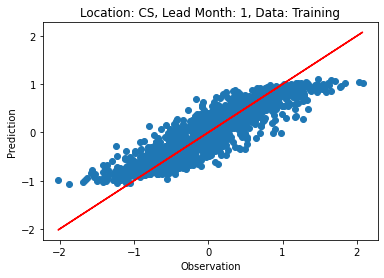

Training Model 5
Epoch [20/400], Avg Loss: 4.6144,  Val MSE: 0.2122
Epoch [40/400], Avg Loss: 0.8242,  Val MSE: 0.1934
Epoch [60/400], Avg Loss: 0.4010,  Val MSE: 0.1647
Epoch [80/400], Avg Loss: 0.3257,  Val MSE: 0.1478
Epoch [100/400], Avg Loss: 0.2937,  Val MSE: 0.1351
Epoch [120/400], Avg Loss: 0.2750,  Val MSE: 0.1275
Epoch [140/400], Avg Loss: 0.2625,  Val MSE: 0.1246
Epoch [160/400], Avg Loss: 0.2532,  Val MSE: 0.1237
Epoch [180/400], Avg Loss: 0.2453,  Val MSE: 0.1231
Epoch [200/400], Avg Loss: 0.2391,  Val MSE: 0.1228
Epoch [220/400], Avg Loss: 0.2342,  Val MSE: 0.1226
Epoch [240/400], Avg Loss: 0.2300,  Val MSE: 0.1225
Epoch [260/400], Avg Loss: 0.2264,  Val MSE: 0.1223
Epoch [280/400], Avg Loss: 0.2243,  Val MSE: 0.1224
Epoch [300/400], Avg Loss: 0.2225,  Val MSE: 0.1223
Epoch [320/400], Avg Loss: 0.2208,  Val MSE: 0.1224
Epoch [340/400], Avg Loss: 0.2188,  Val MSE: 0.1224
Epoch [360/400], Avg Loss: 0.2167,  Val MSE: 0.1226
Epoch [380/400], Avg Loss: 0.2143,  Val MSE: 0.1227

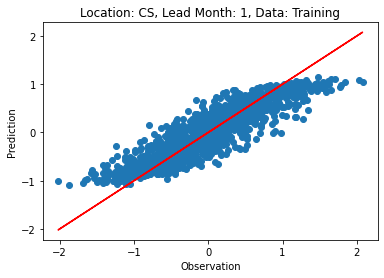

Location: CS
Persistence MSE: 0.1247
Test MSE: 0.1235
Persist CSI: 0.4043
Persist CSI 80: 0.5327
Test CSI: 0.3143
Test CSI 80: 0.4737


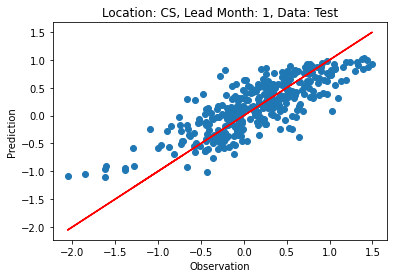

Location: SI
90th Threshold: 1.0238477
80th Threshold: 0.6232777
Training Model 1
Epoch [20/400], Avg Loss: 4.8192,  Val MSE: 0.3154
Epoch [40/400], Avg Loss: 0.9550,  Val MSE: 0.2721
Epoch [60/400], Avg Loss: 0.5384,  Val MSE: 0.2372
Epoch [80/400], Avg Loss: 0.4527,  Val MSE: 0.2270
Epoch [100/400], Avg Loss: 0.4157,  Val MSE: 0.2252
Epoch [120/400], Avg Loss: 0.3934,  Val MSE: 0.2246
Epoch [140/400], Avg Loss: 0.3766,  Val MSE: 0.2248
Epoch [160/400], Avg Loss: 0.3631,  Val MSE: 0.2253
Epoch [180/400], Avg Loss: 0.3518,  Val MSE: 0.2260
Epoch [200/400], Avg Loss: 0.3441,  Val MSE: 0.2267
Epoch [220/400], Avg Loss: 0.3390,  Val MSE: 0.2275
Epoch [240/400], Avg Loss: 0.3341,  Val MSE: 0.2282
Epoch [260/400], Avg Loss: 0.3302,  Val MSE: 0.2288
Epoch [280/400], Avg Loss: 0.3276,  Val MSE: 0.2294
Epoch [300/400], Avg Loss: 0.3253,  Val MSE: 0.2299
Epoch [320/400], Avg Loss: 0.3235,  Val MSE: 0.2303
Epoch [340/400], Avg Loss: 0.3221,  Val MSE: 0.2306
Epoch [360/400], Avg Loss: 0.3210,  Va

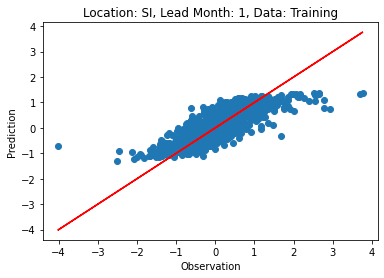

Training Model 2
Epoch [20/400], Avg Loss: 4.7823,  Val MSE: 0.3126
Epoch [40/400], Avg Loss: 0.9317,  Val MSE: 0.2693
Epoch [60/400], Avg Loss: 0.5298,  Val MSE: 0.2362
Epoch [80/400], Avg Loss: 0.4542,  Val MSE: 0.2275
Epoch [100/400], Avg Loss: 0.4152,  Val MSE: 0.2251
Epoch [120/400], Avg Loss: 0.3927,  Val MSE: 0.2242
Epoch [140/400], Avg Loss: 0.3754,  Val MSE: 0.2235
Epoch [160/400], Avg Loss: 0.3642,  Val MSE: 0.2232
Epoch [180/400], Avg Loss: 0.3544,  Val MSE: 0.2233
Epoch [200/400], Avg Loss: 0.3456,  Val MSE: 0.2236
Epoch [220/400], Avg Loss: 0.3383,  Val MSE: 0.2241
Epoch [240/400], Avg Loss: 0.3325,  Val MSE: 0.2245
Epoch [260/400], Avg Loss: 0.3287,  Val MSE: 0.2249
Epoch [280/400], Avg Loss: 0.3255,  Val MSE: 0.2253
Epoch [300/400], Avg Loss: 0.3230,  Val MSE: 0.2258
Epoch [320/400], Avg Loss: 0.3206,  Val MSE: 0.2261
Epoch [340/400], Avg Loss: 0.3185,  Val MSE: 0.2266
Epoch [360/400], Avg Loss: 0.3163,  Val MSE: 0.2270
Epoch [380/400], Avg Loss: 0.3144,  Val MSE: 0.2274

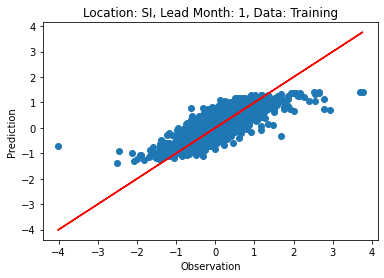

Training Model 3
Epoch [20/400], Avg Loss: 4.7955,  Val MSE: 0.3130
Epoch [40/400], Avg Loss: 0.9101,  Val MSE: 0.2654
Epoch [60/400], Avg Loss: 0.5134,  Val MSE: 0.2337
Epoch [80/400], Avg Loss: 0.4372,  Val MSE: 0.2256
Epoch [100/400], Avg Loss: 0.4046,  Val MSE: 0.2230
Epoch [120/400], Avg Loss: 0.3864,  Val MSE: 0.2223
Epoch [140/400], Avg Loss: 0.3742,  Val MSE: 0.2220
Epoch [160/400], Avg Loss: 0.3647,  Val MSE: 0.2223
Epoch [180/400], Avg Loss: 0.3565,  Val MSE: 0.2226
Epoch [200/400], Avg Loss: 0.3503,  Val MSE: 0.2230
Epoch [220/400], Avg Loss: 0.3454,  Val MSE: 0.2235
Epoch [240/400], Avg Loss: 0.3408,  Val MSE: 0.2241
Epoch [260/400], Avg Loss: 0.3361,  Val MSE: 0.2248
Epoch [280/400], Avg Loss: 0.3312,  Val MSE: 0.2254
Epoch [300/400], Avg Loss: 0.3259,  Val MSE: 0.2259
Epoch [320/400], Avg Loss: 0.3211,  Val MSE: 0.2264
Epoch [340/400], Avg Loss: 0.3177,  Val MSE: 0.2267
Epoch [360/400], Avg Loss: 0.3153,  Val MSE: 0.2271
Epoch [380/400], Avg Loss: 0.3133,  Val MSE: 0.2274

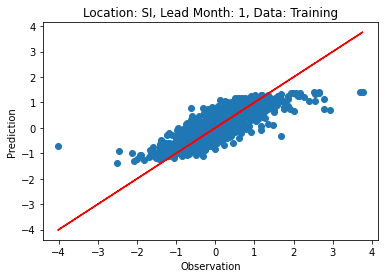

Training Model 4
Epoch [20/400], Avg Loss: 4.7750,  Val MSE: 0.3187
Epoch [40/400], Avg Loss: 0.9316,  Val MSE: 0.2625
Epoch [60/400], Avg Loss: 0.5382,  Val MSE: 0.2321
Epoch [80/400], Avg Loss: 0.4696,  Val MSE: 0.2257
Epoch [100/400], Avg Loss: 0.4371,  Val MSE: 0.2238
Epoch [120/400], Avg Loss: 0.4132,  Val MSE: 0.2230
Epoch [140/400], Avg Loss: 0.3957,  Val MSE: 0.2228
Epoch [160/400], Avg Loss: 0.3822,  Val MSE: 0.2226
Epoch [180/400], Avg Loss: 0.3724,  Val MSE: 0.2228
Epoch [200/400], Avg Loss: 0.3651,  Val MSE: 0.2232
Epoch [220/400], Avg Loss: 0.3585,  Val MSE: 0.2239
Epoch [240/400], Avg Loss: 0.3529,  Val MSE: 0.2246
Epoch [260/400], Avg Loss: 0.3485,  Val MSE: 0.2253
Epoch [280/400], Avg Loss: 0.3437,  Val MSE: 0.2259
Epoch [300/400], Avg Loss: 0.3390,  Val MSE: 0.2266
Epoch [320/400], Avg Loss: 0.3339,  Val MSE: 0.2273
Epoch [340/400], Avg Loss: 0.3298,  Val MSE: 0.2279
Epoch [360/400], Avg Loss: 0.3267,  Val MSE: 0.2283
Epoch [380/400], Avg Loss: 0.3245,  Val MSE: 0.2287

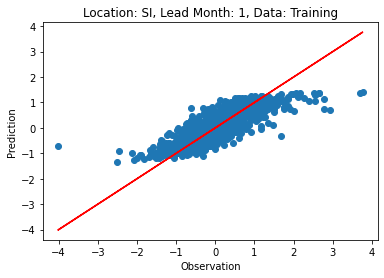

Training Model 5
Epoch [20/400], Avg Loss: 4.7472,  Val MSE: 0.2966
Epoch [40/400], Avg Loss: 0.8884,  Val MSE: 0.2586
Epoch [60/400], Avg Loss: 0.5227,  Val MSE: 0.2317
Epoch [80/400], Avg Loss: 0.4529,  Val MSE: 0.2243
Epoch [100/400], Avg Loss: 0.4178,  Val MSE: 0.2222
Epoch [120/400], Avg Loss: 0.3948,  Val MSE: 0.2216
Epoch [140/400], Avg Loss: 0.3791,  Val MSE: 0.2210
Epoch [160/400], Avg Loss: 0.3678,  Val MSE: 0.2210
Epoch [180/400], Avg Loss: 0.3586,  Val MSE: 0.2213
Epoch [200/400], Avg Loss: 0.3509,  Val MSE: 0.2217
Epoch [220/400], Avg Loss: 0.3441,  Val MSE: 0.2221
Epoch [240/400], Avg Loss: 0.3391,  Val MSE: 0.2224
Epoch [260/400], Avg Loss: 0.3350,  Val MSE: 0.2228
Epoch [280/400], Avg Loss: 0.3319,  Val MSE: 0.2231
Epoch [300/400], Avg Loss: 0.3286,  Val MSE: 0.2234
Epoch [320/400], Avg Loss: 0.3255,  Val MSE: 0.2234
Epoch [340/400], Avg Loss: 0.3236,  Val MSE: 0.2236
Epoch [360/400], Avg Loss: 0.3223,  Val MSE: 0.2238
Epoch [380/400], Avg Loss: 0.3212,  Val MSE: 0.2241

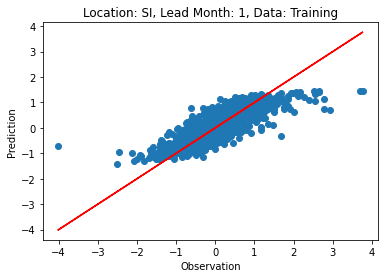

Location: SI
Persistence MSE: 0.2440
Test MSE: 0.2281
Persist CSI: 0.4545
Persist CSI 80: 0.4646
Test CSI: 0.4474
Test CSI 80: 0.4646


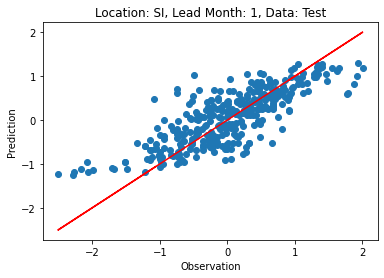

Location: CR
90th Threshold: 1.0850446
80th Threshold: 0.6930024
Training Model 1
Epoch [20/400], Avg Loss: 4.8491,  Val MSE: 0.2852
Epoch [40/400], Avg Loss: 1.0261,  Val MSE: 0.2567
Epoch [60/400], Avg Loss: 0.6097,  Val MSE: 0.2237
Epoch [80/400], Avg Loss: 0.5227,  Val MSE: 0.2187
Epoch [100/400], Avg Loss: 0.4827,  Val MSE: 0.2183
Epoch [120/400], Avg Loss: 0.4596,  Val MSE: 0.2187
Epoch [140/400], Avg Loss: 0.4453,  Val MSE: 0.2197
Epoch [160/400], Avg Loss: 0.4338,  Val MSE: 0.2205
Epoch [180/400], Avg Loss: 0.4257,  Val MSE: 0.2214
Epoch [200/400], Avg Loss: 0.4200,  Val MSE: 0.2223
Epoch [220/400], Avg Loss: 0.4163,  Val MSE: 0.2230
Epoch [240/400], Avg Loss: 0.4138,  Val MSE: 0.2237
Epoch [260/400], Avg Loss: 0.4114,  Val MSE: 0.2249
Epoch [280/400], Avg Loss: 0.4088,  Val MSE: 0.2258
Epoch [300/400], Avg Loss: 0.4065,  Val MSE: 0.2266
Epoch [320/400], Avg Loss: 0.4040,  Val MSE: 0.2274
Epoch [340/400], Avg Loss: 0.4016,  Val MSE: 0.2282
Epoch [360/400], Avg Loss: 0.3997,  Va

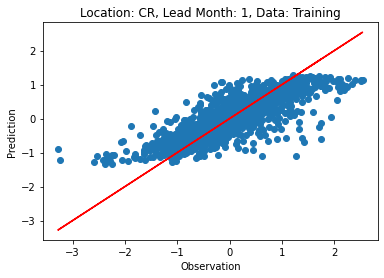

Training Model 2
Epoch [20/400], Avg Loss: 4.8262,  Val MSE: 0.2785
Epoch [40/400], Avg Loss: 0.9950,  Val MSE: 0.2496
Epoch [60/400], Avg Loss: 0.5926,  Val MSE: 0.2199
Epoch [80/400], Avg Loss: 0.5057,  Val MSE: 0.2176
Epoch [100/400], Avg Loss: 0.4664,  Val MSE: 0.2184
Epoch [120/400], Avg Loss: 0.4453,  Val MSE: 0.2197
Epoch [140/400], Avg Loss: 0.4299,  Val MSE: 0.2217
Epoch [160/400], Avg Loss: 0.4169,  Val MSE: 0.2236
Epoch [180/400], Avg Loss: 0.4065,  Val MSE: 0.2257
Epoch [200/400], Avg Loss: 0.3990,  Val MSE: 0.2275
Epoch [220/400], Avg Loss: 0.3941,  Val MSE: 0.2288
Epoch [240/400], Avg Loss: 0.3907,  Val MSE: 0.2300
Epoch [260/400], Avg Loss: 0.3881,  Val MSE: 0.2311
Epoch [280/400], Avg Loss: 0.3862,  Val MSE: 0.2320
Epoch [300/400], Avg Loss: 0.3847,  Val MSE: 0.2328
Epoch [320/400], Avg Loss: 0.3835,  Val MSE: 0.2335
Epoch [340/400], Avg Loss: 0.3828,  Val MSE: 0.2341
Epoch [360/400], Avg Loss: 0.3820,  Val MSE: 0.2347
Epoch [380/400], Avg Loss: 0.3811,  Val MSE: 0.2355

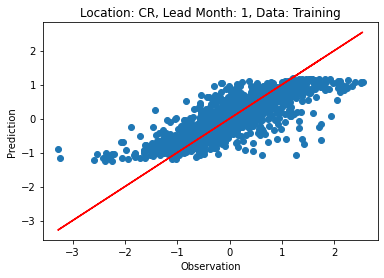

Training Model 3
Epoch [20/400], Avg Loss: 4.8022,  Val MSE: 0.2793
Epoch [40/400], Avg Loss: 1.0112,  Val MSE: 0.2510
Epoch [60/400], Avg Loss: 0.5970,  Val MSE: 0.2203
Epoch [80/400], Avg Loss: 0.5310,  Val MSE: 0.2179
Epoch [100/400], Avg Loss: 0.5009,  Val MSE: 0.2178
Epoch [120/400], Avg Loss: 0.4771,  Val MSE: 0.2184
Epoch [140/400], Avg Loss: 0.4590,  Val MSE: 0.2194
Epoch [160/400], Avg Loss: 0.4460,  Val MSE: 0.2205
Epoch [180/400], Avg Loss: 0.4376,  Val MSE: 0.2216
Epoch [200/400], Avg Loss: 0.4316,  Val MSE: 0.2225
Epoch [220/400], Avg Loss: 0.4265,  Val MSE: 0.2235
Epoch [240/400], Avg Loss: 0.4219,  Val MSE: 0.2247
Epoch [260/400], Avg Loss: 0.4172,  Val MSE: 0.2259
Epoch [280/400], Avg Loss: 0.4128,  Val MSE: 0.2271
Epoch [300/400], Avg Loss: 0.4083,  Val MSE: 0.2281
Epoch [320/400], Avg Loss: 0.4042,  Val MSE: 0.2292
Epoch [340/400], Avg Loss: 0.4002,  Val MSE: 0.2300
Epoch [360/400], Avg Loss: 0.3964,  Val MSE: 0.2307
Epoch [380/400], Avg Loss: 0.3929,  Val MSE: 0.2312

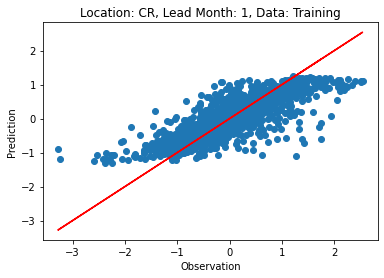

Training Model 4
Epoch [20/400], Avg Loss: 4.8749,  Val MSE: 0.2731
Epoch [40/400], Avg Loss: 1.0163,  Val MSE: 0.2479
Epoch [60/400], Avg Loss: 0.6230,  Val MSE: 0.2218
Epoch [80/400], Avg Loss: 0.5440,  Val MSE: 0.2183
Epoch [100/400], Avg Loss: 0.4946,  Val MSE: 0.2181
Epoch [120/400], Avg Loss: 0.4638,  Val MSE: 0.2189
Epoch [140/400], Avg Loss: 0.4429,  Val MSE: 0.2205
Epoch [160/400], Avg Loss: 0.4299,  Val MSE: 0.2228
Epoch [180/400], Avg Loss: 0.4197,  Val MSE: 0.2247
Epoch [200/400], Avg Loss: 0.4120,  Val MSE: 0.2262
Epoch [220/400], Avg Loss: 0.4068,  Val MSE: 0.2276
Epoch [240/400], Avg Loss: 0.4034,  Val MSE: 0.2287
Epoch [260/400], Avg Loss: 0.4011,  Val MSE: 0.2296
Epoch [280/400], Avg Loss: 0.3991,  Val MSE: 0.2304
Epoch [300/400], Avg Loss: 0.3977,  Val MSE: 0.2311
Epoch [320/400], Avg Loss: 0.3962,  Val MSE: 0.2319
Epoch [340/400], Avg Loss: 0.3945,  Val MSE: 0.2325
Epoch [360/400], Avg Loss: 0.3925,  Val MSE: 0.2331
Epoch [380/400], Avg Loss: 0.3903,  Val MSE: 0.2337

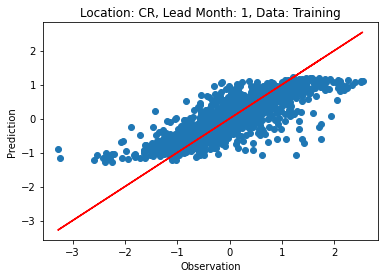

Training Model 5
Epoch [20/400], Avg Loss: 4.7731,  Val MSE: 0.2739
Epoch [40/400], Avg Loss: 0.9969,  Val MSE: 0.2486
Epoch [60/400], Avg Loss: 0.6132,  Val MSE: 0.2220
Epoch [80/400], Avg Loss: 0.5261,  Val MSE: 0.2179
Epoch [100/400], Avg Loss: 0.4800,  Val MSE: 0.2178
Epoch [120/400], Avg Loss: 0.4512,  Val MSE: 0.2187
Epoch [140/400], Avg Loss: 0.4327,  Val MSE: 0.2201
Epoch [160/400], Avg Loss: 0.4195,  Val MSE: 0.2214
Epoch [180/400], Avg Loss: 0.4115,  Val MSE: 0.2225
Epoch [200/400], Avg Loss: 0.4071,  Val MSE: 0.2236
Epoch [220/400], Avg Loss: 0.4040,  Val MSE: 0.2247
Epoch [240/400], Avg Loss: 0.4016,  Val MSE: 0.2257
Epoch [260/400], Avg Loss: 0.3994,  Val MSE: 0.2267
Epoch [280/400], Avg Loss: 0.3971,  Val MSE: 0.2276
Epoch [300/400], Avg Loss: 0.3955,  Val MSE: 0.2284
Epoch [320/400], Avg Loss: 0.3945,  Val MSE: 0.2292
Epoch [340/400], Avg Loss: 0.3934,  Val MSE: 0.2300
Epoch [360/400], Avg Loss: 0.3926,  Val MSE: 0.2306
Epoch [380/400], Avg Loss: 0.3921,  Val MSE: 0.2312

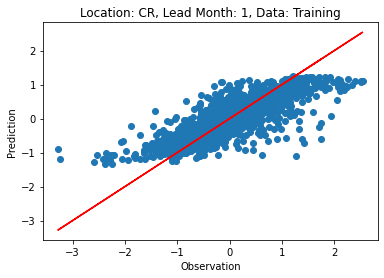

Location: CR
Persistence MSE: 0.2468
Test MSE: 0.2327
Persist CSI: 0.3286
Persist CSI 80: 0.4959
Test CSI: 0.1373
Test CSI 80: 0.4224


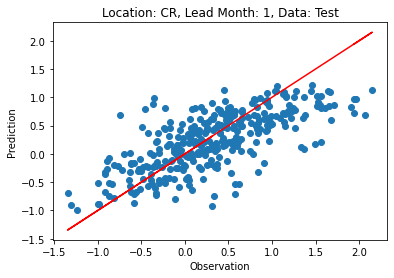

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6495769
Training Model 1
Epoch [20/400], Avg Loss: 4.7650,  Val MSE: 0.3549
Epoch [40/400], Avg Loss: 0.8978,  Val MSE: 0.3238
Epoch [60/400], Avg Loss: 0.5202,  Val MSE: 0.2979
Epoch [80/400], Avg Loss: 0.4546,  Val MSE: 0.2901
Epoch [100/400], Avg Loss: 0.4229,  Val MSE: 0.2853
Epoch [120/400], Avg Loss: 0.4008,  Val MSE: 0.2822
Epoch [140/400], Avg Loss: 0.3841,  Val MSE: 0.2807
Epoch [160/400], Avg Loss: 0.3714,  Val MSE: 0.2794
Epoch [180/400], Avg Loss: 0.3614,  Val MSE: 0.2783
Epoch [200/400], Avg Loss: 0.3530,  Val MSE: 0.2773
Epoch [220/400], Avg Loss: 0.3457,  Val MSE: 0.2766
Epoch [240/400], Avg Loss: 0.3383,  Val MSE: 0.2766
Epoch [260/400], Avg Loss: 0.3322,  Val MSE: 0.2768
Epoch [280/400], Avg Loss: 0.3270,  Val MSE: 0.2768
Epoch [300/400], Avg Loss: 0.3236,  Val MSE: 0.2770
Epoch [320/400], Avg Loss: 0.3208,  Val MSE: 0.2772
Epoch [340/400], Avg Loss: 0.3182,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3162,  Va

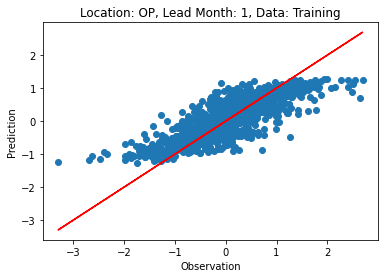

Training Model 2
Epoch [20/400], Avg Loss: 4.7968,  Val MSE: 0.3592
Epoch [40/400], Avg Loss: 0.9300,  Val MSE: 0.3230
Epoch [60/400], Avg Loss: 0.5340,  Val MSE: 0.2961
Epoch [80/400], Avg Loss: 0.4574,  Val MSE: 0.2890
Epoch [100/400], Avg Loss: 0.4181,  Val MSE: 0.2850
Epoch [120/400], Avg Loss: 0.3957,  Val MSE: 0.2826
Epoch [140/400], Avg Loss: 0.3814,  Val MSE: 0.2803
Epoch [160/400], Avg Loss: 0.3710,  Val MSE: 0.2783
Epoch [180/400], Avg Loss: 0.3628,  Val MSE: 0.2770
Epoch [200/400], Avg Loss: 0.3561,  Val MSE: 0.2765
Epoch [220/400], Avg Loss: 0.3498,  Val MSE: 0.2762
Epoch [240/400], Avg Loss: 0.3442,  Val MSE: 0.2764
Epoch [260/400], Avg Loss: 0.3393,  Val MSE: 0.2768
Epoch [280/400], Avg Loss: 0.3347,  Val MSE: 0.2771
Epoch [300/400], Avg Loss: 0.3307,  Val MSE: 0.2773
Epoch [320/400], Avg Loss: 0.3265,  Val MSE: 0.2774
Epoch [340/400], Avg Loss: 0.3228,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3198,  Val MSE: 0.2775
Epoch [380/400], Avg Loss: 0.3176,  Val MSE: 0.2774

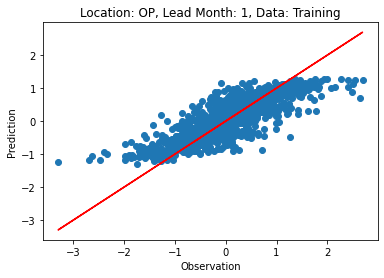

Training Model 3
Epoch [20/400], Avg Loss: 4.7662,  Val MSE: 0.3548
Epoch [40/400], Avg Loss: 0.9030,  Val MSE: 0.3219
Epoch [60/400], Avg Loss: 0.5156,  Val MSE: 0.2960
Epoch [80/400], Avg Loss: 0.4427,  Val MSE: 0.2897
Epoch [100/400], Avg Loss: 0.4072,  Val MSE: 0.2848
Epoch [120/400], Avg Loss: 0.3859,  Val MSE: 0.2823
Epoch [140/400], Avg Loss: 0.3697,  Val MSE: 0.2806
Epoch [160/400], Avg Loss: 0.3556,  Val MSE: 0.2794
Epoch [180/400], Avg Loss: 0.3457,  Val MSE: 0.2784
Epoch [200/400], Avg Loss: 0.3390,  Val MSE: 0.2774
Epoch [220/400], Avg Loss: 0.3341,  Val MSE: 0.2774
Epoch [240/400], Avg Loss: 0.3308,  Val MSE: 0.2774
Epoch [260/400], Avg Loss: 0.3282,  Val MSE: 0.2776
Epoch [280/400], Avg Loss: 0.3262,  Val MSE: 0.2778
Epoch [300/400], Avg Loss: 0.3237,  Val MSE: 0.2779
Epoch [320/400], Avg Loss: 0.3208,  Val MSE: 0.2780
Epoch [340/400], Avg Loss: 0.3180,  Val MSE: 0.2778
Epoch [360/400], Avg Loss: 0.3159,  Val MSE: 0.2779
Epoch [380/400], Avg Loss: 0.3146,  Val MSE: 0.2780

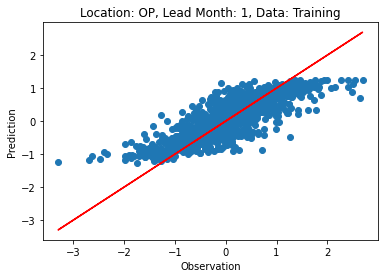

Training Model 4
Epoch [20/400], Avg Loss: 4.7600,  Val MSE: 0.3566
Epoch [40/400], Avg Loss: 0.8840,  Val MSE: 0.3190
Epoch [60/400], Avg Loss: 0.5102,  Val MSE: 0.2938
Epoch [80/400], Avg Loss: 0.4436,  Val MSE: 0.2883
Epoch [100/400], Avg Loss: 0.4111,  Val MSE: 0.2846
Epoch [120/400], Avg Loss: 0.3910,  Val MSE: 0.2820
Epoch [140/400], Avg Loss: 0.3752,  Val MSE: 0.2797
Epoch [160/400], Avg Loss: 0.3632,  Val MSE: 0.2780
Epoch [180/400], Avg Loss: 0.3554,  Val MSE: 0.2770
Epoch [200/400], Avg Loss: 0.3490,  Val MSE: 0.2763
Epoch [220/400], Avg Loss: 0.3446,  Val MSE: 0.2761
Epoch [240/400], Avg Loss: 0.3409,  Val MSE: 0.2759
Epoch [260/400], Avg Loss: 0.3371,  Val MSE: 0.2758
Epoch [280/400], Avg Loss: 0.3342,  Val MSE: 0.2759
Epoch [300/400], Avg Loss: 0.3313,  Val MSE: 0.2761
Epoch [320/400], Avg Loss: 0.3289,  Val MSE: 0.2763
Epoch [340/400], Avg Loss: 0.3271,  Val MSE: 0.2765
Epoch [360/400], Avg Loss: 0.3255,  Val MSE: 0.2767
Epoch [380/400], Avg Loss: 0.3237,  Val MSE: 0.2769

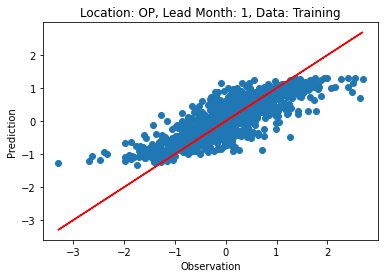

Training Model 5
Epoch [20/400], Avg Loss: 4.7447,  Val MSE: 0.3536
Epoch [40/400], Avg Loss: 0.9334,  Val MSE: 0.3234
Epoch [60/400], Avg Loss: 0.5400,  Val MSE: 0.2947
Epoch [80/400], Avg Loss: 0.4647,  Val MSE: 0.2882
Epoch [100/400], Avg Loss: 0.4241,  Val MSE: 0.2844
Epoch [120/400], Avg Loss: 0.3975,  Val MSE: 0.2814
Epoch [140/400], Avg Loss: 0.3785,  Val MSE: 0.2796
Epoch [160/400], Avg Loss: 0.3641,  Val MSE: 0.2782
Epoch [180/400], Avg Loss: 0.3528,  Val MSE: 0.2773
Epoch [200/400], Avg Loss: 0.3450,  Val MSE: 0.2770
Epoch [220/400], Avg Loss: 0.3384,  Val MSE: 0.2773
Epoch [240/400], Avg Loss: 0.3327,  Val MSE: 0.2773
Epoch [260/400], Avg Loss: 0.3278,  Val MSE: 0.2774
Epoch [280/400], Avg Loss: 0.3239,  Val MSE: 0.2773
Epoch [300/400], Avg Loss: 0.3207,  Val MSE: 0.2774
Epoch [320/400], Avg Loss: 0.3181,  Val MSE: 0.2774
Epoch [340/400], Avg Loss: 0.3162,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3151,  Val MSE: 0.2775
Epoch [380/400], Avg Loss: 0.3139,  Val MSE: 0.2777

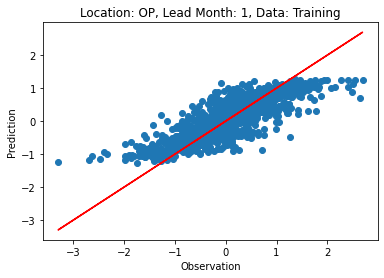

Location: OP
Persistence MSE: 0.3155
Test MSE: 0.2776
Persist CSI: 0.3478
Persist CSI 80: 0.4198
Test CSI: 0.4103
Test CSI 80: 0.4430


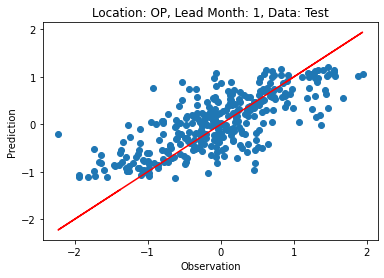

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.8168559
Training Model 1
Epoch [20/400], Avg Loss: 4.8085,  Val MSE: 0.5035
Epoch [40/400], Avg Loss: 1.0017,  Val MSE: 0.4268
Epoch [60/400], Avg Loss: 0.6046,  Val MSE: 0.3935
Epoch [80/400], Avg Loss: 0.5144,  Val MSE: 0.3833
Epoch [100/400], Avg Loss: 0.4722,  Val MSE: 0.3805
Epoch [120/400], Avg Loss: 0.4478,  Val MSE: 0.3811
Epoch [140/400], Avg Loss: 0.4288,  Val MSE: 0.3830
Epoch [160/400], Avg Loss: 0.4146,  Val MSE: 0.3845
Epoch [180/400], Avg Loss: 0.4058,  Val MSE: 0.3867
Epoch [200/400], Avg Loss: 0.3993,  Val MSE: 0.3893
Epoch [220/400], Avg Loss: 0.3941,  Val MSE: 0.3917
Epoch [240/400], Avg Loss: 0.3899,  Val MSE: 0.3935
Epoch [260/400], Avg Loss: 0.3851,  Val MSE: 0.3950
Epoch [280/400], Avg Loss: 0.3804,  Val MSE: 0.3963
Epoch [300/400], Avg Loss: 0.3770,  Val MSE: 0.3973
Epoch [320/400], Avg Loss: 0.3753,  Val MSE: 0.3982
Epoch [340/400], Avg Loss: 0.3739,  Val MSE: 0.3993
Epoch [360/400], Avg Loss: 0.3731,  Val

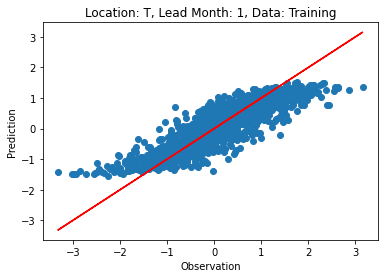

Training Model 2
Epoch [20/400], Avg Loss: 4.8732,  Val MSE: 0.4980
Epoch [40/400], Avg Loss: 1.0153,  Val MSE: 0.4313
Epoch [60/400], Avg Loss: 0.6076,  Val MSE: 0.3936
Epoch [80/400], Avg Loss: 0.5282,  Val MSE: 0.3860
Epoch [100/400], Avg Loss: 0.4879,  Val MSE: 0.3845
Epoch [120/400], Avg Loss: 0.4634,  Val MSE: 0.3832
Epoch [140/400], Avg Loss: 0.4465,  Val MSE: 0.3830
Epoch [160/400], Avg Loss: 0.4358,  Val MSE: 0.3850
Epoch [180/400], Avg Loss: 0.4271,  Val MSE: 0.3876
Epoch [200/400], Avg Loss: 0.4197,  Val MSE: 0.3904
Epoch [220/400], Avg Loss: 0.4138,  Val MSE: 0.3924
Epoch [240/400], Avg Loss: 0.4094,  Val MSE: 0.3940
Epoch [260/400], Avg Loss: 0.4061,  Val MSE: 0.3954
Epoch [280/400], Avg Loss: 0.4037,  Val MSE: 0.3968
Epoch [300/400], Avg Loss: 0.4012,  Val MSE: 0.3984
Epoch [320/400], Avg Loss: 0.3992,  Val MSE: 0.3999
Epoch [340/400], Avg Loss: 0.3977,  Val MSE: 0.4010
Epoch [360/400], Avg Loss: 0.3959,  Val MSE: 0.4023
Epoch [380/400], Avg Loss: 0.3937,  Val MSE: 0.4034

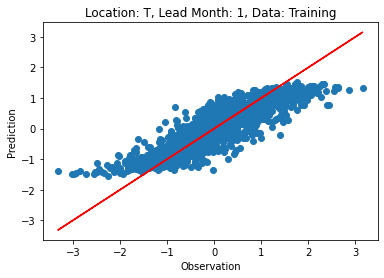

Training Model 3
Epoch [20/400], Avg Loss: 4.8355,  Val MSE: 0.4988
Epoch [40/400], Avg Loss: 1.0534,  Val MSE: 0.4347
Epoch [60/400], Avg Loss: 0.6296,  Val MSE: 0.3955
Epoch [80/400], Avg Loss: 0.5272,  Val MSE: 0.3833
Epoch [100/400], Avg Loss: 0.4797,  Val MSE: 0.3820
Epoch [120/400], Avg Loss: 0.4542,  Val MSE: 0.3826
Epoch [140/400], Avg Loss: 0.4370,  Val MSE: 0.3836
Epoch [160/400], Avg Loss: 0.4241,  Val MSE: 0.3856
Epoch [180/400], Avg Loss: 0.4133,  Val MSE: 0.3882
Epoch [200/400], Avg Loss: 0.4049,  Val MSE: 0.3908
Epoch [220/400], Avg Loss: 0.3992,  Val MSE: 0.3930
Epoch [240/400], Avg Loss: 0.3948,  Val MSE: 0.3943
Epoch [260/400], Avg Loss: 0.3907,  Val MSE: 0.3954
Epoch [280/400], Avg Loss: 0.3865,  Val MSE: 0.3965
Epoch [300/400], Avg Loss: 0.3822,  Val MSE: 0.3970
Epoch [320/400], Avg Loss: 0.3785,  Val MSE: 0.3976
Epoch [340/400], Avg Loss: 0.3767,  Val MSE: 0.3981
Epoch [360/400], Avg Loss: 0.3759,  Val MSE: 0.3983
Epoch [380/400], Avg Loss: 0.3753,  Val MSE: 0.3987

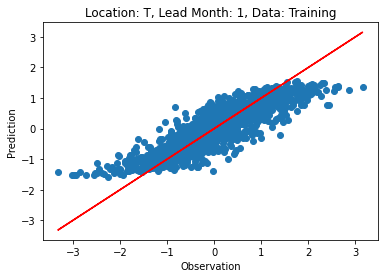

Training Model 4
Epoch [20/400], Avg Loss: 4.8116,  Val MSE: 0.4890
Epoch [40/400], Avg Loss: 1.0445,  Val MSE: 0.4311
Epoch [60/400], Avg Loss: 0.6417,  Val MSE: 0.3966
Epoch [80/400], Avg Loss: 0.5483,  Val MSE: 0.3808
Epoch [100/400], Avg Loss: 0.4998,  Val MSE: 0.3763
Epoch [120/400], Avg Loss: 0.4727,  Val MSE: 0.3761
Epoch [140/400], Avg Loss: 0.4547,  Val MSE: 0.3769
Epoch [160/400], Avg Loss: 0.4405,  Val MSE: 0.3779
Epoch [180/400], Avg Loss: 0.4298,  Val MSE: 0.3794
Epoch [200/400], Avg Loss: 0.4229,  Val MSE: 0.3822
Epoch [220/400], Avg Loss: 0.4166,  Val MSE: 0.3847
Epoch [240/400], Avg Loss: 0.4107,  Val MSE: 0.3867
Epoch [260/400], Avg Loss: 0.4056,  Val MSE: 0.3882
Epoch [280/400], Avg Loss: 0.4010,  Val MSE: 0.3899
Epoch [300/400], Avg Loss: 0.3973,  Val MSE: 0.3912
Epoch [320/400], Avg Loss: 0.3944,  Val MSE: 0.3924
Epoch [340/400], Avg Loss: 0.3922,  Val MSE: 0.3935
Epoch [360/400], Avg Loss: 0.3906,  Val MSE: 0.3944
Epoch [380/400], Avg Loss: 0.3892,  Val MSE: 0.3954

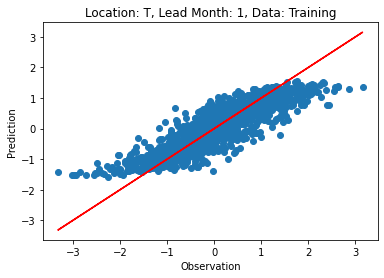

Training Model 5
Epoch [20/400], Avg Loss: 4.8482,  Val MSE: 0.5040
Epoch [40/400], Avg Loss: 1.0280,  Val MSE: 0.4339
Epoch [60/400], Avg Loss: 0.6062,  Val MSE: 0.3936
Epoch [80/400], Avg Loss: 0.5248,  Val MSE: 0.3827
Epoch [100/400], Avg Loss: 0.4893,  Val MSE: 0.3806
Epoch [120/400], Avg Loss: 0.4650,  Val MSE: 0.3807
Epoch [140/400], Avg Loss: 0.4456,  Val MSE: 0.3808
Epoch [160/400], Avg Loss: 0.4310,  Val MSE: 0.3817
Epoch [180/400], Avg Loss: 0.4211,  Val MSE: 0.3834
Epoch [200/400], Avg Loss: 0.4143,  Val MSE: 0.3851
Epoch [220/400], Avg Loss: 0.4088,  Val MSE: 0.3870
Epoch [240/400], Avg Loss: 0.4043,  Val MSE: 0.3883
Epoch [260/400], Avg Loss: 0.4009,  Val MSE: 0.3895
Epoch [280/400], Avg Loss: 0.3983,  Val MSE: 0.3907
Epoch [300/400], Avg Loss: 0.3962,  Val MSE: 0.3920
Epoch [320/400], Avg Loss: 0.3942,  Val MSE: 0.3933
Epoch [340/400], Avg Loss: 0.3921,  Val MSE: 0.3945
Epoch [360/400], Avg Loss: 0.3898,  Val MSE: 0.3953
Epoch [380/400], Avg Loss: 0.3879,  Val MSE: 0.3962

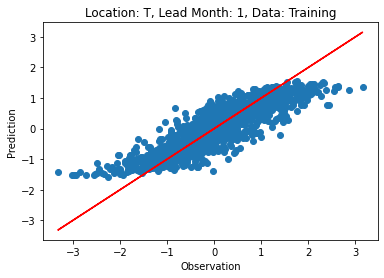

Location: T
Persistence MSE: 0.3926
Test MSE: 0.3995
Persist CSI: 0.4595
Persist CSI 80: 0.5541
Test CSI: 0.3735
Test CSI 80: 0.5782


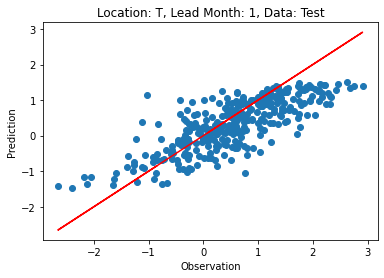

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.6538955
Training Model 1
Epoch [20/400], Avg Loss: 4.8534,  Val MSE: 0.4461
Epoch [40/400], Avg Loss: 1.0214,  Val MSE: 0.4009
Epoch [60/400], Avg Loss: 0.6416,  Val MSE: 0.3852
Epoch [80/400], Avg Loss: 0.5728,  Val MSE: 0.3822
Epoch [100/400], Avg Loss: 0.5352,  Val MSE: 0.3808
Epoch [120/400], Avg Loss: 0.5121,  Val MSE: 0.3799
Epoch [140/400], Avg Loss: 0.4958,  Val MSE: 0.3795
Epoch [160/400], Avg Loss: 0.4830,  Val MSE: 0.3792
Epoch [180/400], Avg Loss: 0.4720,  Val MSE: 0.3793
Epoch [200/400], Avg Loss: 0.4625,  Val MSE: 0.3797
Epoch [220/400], Avg Loss: 0.4536,  Val MSE: 0.3802
Epoch [240/400], Avg Loss: 0.4457,  Val MSE: 0.3807
Epoch [260/400], Avg Loss: 0.4394,  Val MSE: 0.3810
Epoch [280/400], Avg Loss: 0.4344,  Val MSE: 0.3812
Epoch [300/400], Avg Loss: 0.4305,  Val MSE: 0.3815
Epoch [320/400], Avg Loss: 0.4276,  Val MSE: 0.3818
Epoch [340/400], Avg Loss: 0.4250,  Val MSE: 0.3818
Epoch [360/400], Avg Loss: 0.4225,  Va

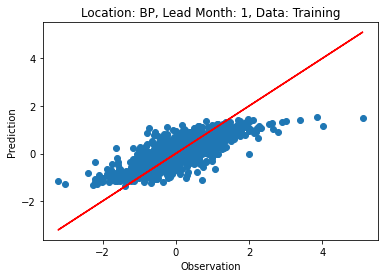

Training Model 2
Epoch [20/400], Avg Loss: 4.8787,  Val MSE: 0.4544
Epoch [40/400], Avg Loss: 1.0436,  Val MSE: 0.3990
Epoch [60/400], Avg Loss: 0.6469,  Val MSE: 0.3850
Epoch [80/400], Avg Loss: 0.5768,  Val MSE: 0.3836
Epoch [100/400], Avg Loss: 0.5383,  Val MSE: 0.3822
Epoch [120/400], Avg Loss: 0.5129,  Val MSE: 0.3809
Epoch [140/400], Avg Loss: 0.4960,  Val MSE: 0.3801
Epoch [160/400], Avg Loss: 0.4827,  Val MSE: 0.3799
Epoch [180/400], Avg Loss: 0.4719,  Val MSE: 0.3800
Epoch [200/400], Avg Loss: 0.4635,  Val MSE: 0.3803
Epoch [220/400], Avg Loss: 0.4565,  Val MSE: 0.3805
Epoch [240/400], Avg Loss: 0.4506,  Val MSE: 0.3809
Epoch [260/400], Avg Loss: 0.4450,  Val MSE: 0.3813
Epoch [280/400], Avg Loss: 0.4403,  Val MSE: 0.3816
Epoch [300/400], Avg Loss: 0.4371,  Val MSE: 0.3818
Epoch [320/400], Avg Loss: 0.4338,  Val MSE: 0.3821
Epoch [340/400], Avg Loss: 0.4313,  Val MSE: 0.3822
Epoch [360/400], Avg Loss: 0.4294,  Val MSE: 0.3823
Epoch [380/400], Avg Loss: 0.4275,  Val MSE: 0.3825

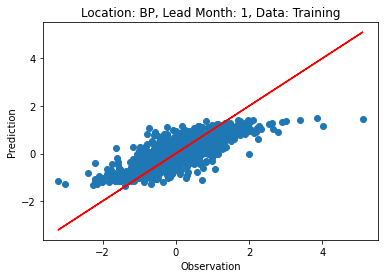

Training Model 3
Epoch [20/400], Avg Loss: 4.8752,  Val MSE: 0.4526
Epoch [40/400], Avg Loss: 1.0006,  Val MSE: 0.4016
Epoch [60/400], Avg Loss: 0.6088,  Val MSE: 0.3814
Epoch [80/400], Avg Loss: 0.5384,  Val MSE: 0.3797
Epoch [100/400], Avg Loss: 0.5041,  Val MSE: 0.3787
Epoch [120/400], Avg Loss: 0.4856,  Val MSE: 0.3787
Epoch [140/400], Avg Loss: 0.4713,  Val MSE: 0.3794
Epoch [160/400], Avg Loss: 0.4606,  Val MSE: 0.3801
Epoch [180/400], Avg Loss: 0.4531,  Val MSE: 0.3807
Epoch [200/400], Avg Loss: 0.4469,  Val MSE: 0.3811
Epoch [220/400], Avg Loss: 0.4425,  Val MSE: 0.3815
Epoch [240/400], Avg Loss: 0.4392,  Val MSE: 0.3818
Epoch [260/400], Avg Loss: 0.4370,  Val MSE: 0.3821
Epoch [280/400], Avg Loss: 0.4349,  Val MSE: 0.3825
Epoch [300/400], Avg Loss: 0.4326,  Val MSE: 0.3828
Epoch [320/400], Avg Loss: 0.4303,  Val MSE: 0.3831
Epoch [340/400], Avg Loss: 0.4285,  Val MSE: 0.3832
Epoch [360/400], Avg Loss: 0.4262,  Val MSE: 0.3834
Epoch [380/400], Avg Loss: 0.4242,  Val MSE: 0.3836

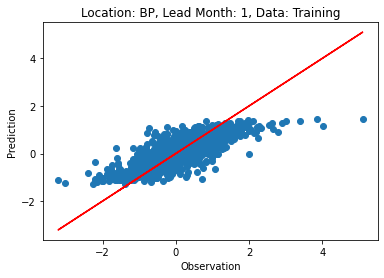

Training Model 4
Epoch [20/400], Avg Loss: 4.9201,  Val MSE: 0.4711
Epoch [40/400], Avg Loss: 1.0425,  Val MSE: 0.4059
Epoch [60/400], Avg Loss: 0.6443,  Val MSE: 0.3859
Epoch [80/400], Avg Loss: 0.5690,  Val MSE: 0.3836
Epoch [100/400], Avg Loss: 0.5368,  Val MSE: 0.3817
Epoch [120/400], Avg Loss: 0.5196,  Val MSE: 0.3804
Epoch [140/400], Avg Loss: 0.5052,  Val MSE: 0.3800
Epoch [160/400], Avg Loss: 0.4922,  Val MSE: 0.3802
Epoch [180/400], Avg Loss: 0.4820,  Val MSE: 0.3805
Epoch [200/400], Avg Loss: 0.4733,  Val MSE: 0.3808
Epoch [220/400], Avg Loss: 0.4658,  Val MSE: 0.3811
Epoch [240/400], Avg Loss: 0.4588,  Val MSE: 0.3814
Epoch [260/400], Avg Loss: 0.4520,  Val MSE: 0.3819
Epoch [280/400], Avg Loss: 0.4462,  Val MSE: 0.3820
Epoch [300/400], Avg Loss: 0.4407,  Val MSE: 0.3821
Epoch [320/400], Avg Loss: 0.4358,  Val MSE: 0.3823
Epoch [340/400], Avg Loss: 0.4312,  Val MSE: 0.3824
Epoch [360/400], Avg Loss: 0.4268,  Val MSE: 0.3826
Epoch [380/400], Avg Loss: 0.4230,  Val MSE: 0.3826

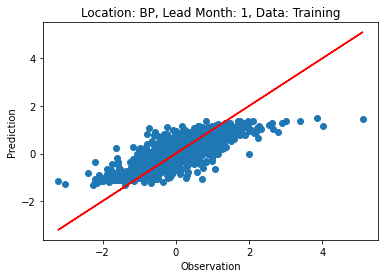

Training Model 5
Epoch [20/400], Avg Loss: 4.8687,  Val MSE: 0.4467
Epoch [40/400], Avg Loss: 1.0180,  Val MSE: 0.3994
Epoch [60/400], Avg Loss: 0.6336,  Val MSE: 0.3823
Epoch [80/400], Avg Loss: 0.5638,  Val MSE: 0.3796
Epoch [100/400], Avg Loss: 0.5322,  Val MSE: 0.3781
Epoch [120/400], Avg Loss: 0.5123,  Val MSE: 0.3780
Epoch [140/400], Avg Loss: 0.4970,  Val MSE: 0.3784
Epoch [160/400], Avg Loss: 0.4835,  Val MSE: 0.3791
Epoch [180/400], Avg Loss: 0.4718,  Val MSE: 0.3801
Epoch [200/400], Avg Loss: 0.4623,  Val MSE: 0.3808
Epoch [220/400], Avg Loss: 0.4540,  Val MSE: 0.3813
Epoch [240/400], Avg Loss: 0.4480,  Val MSE: 0.3818
Epoch [260/400], Avg Loss: 0.4432,  Val MSE: 0.3822
Epoch [280/400], Avg Loss: 0.4386,  Val MSE: 0.3825
Epoch [300/400], Avg Loss: 0.4341,  Val MSE: 0.3829
Epoch [320/400], Avg Loss: 0.4291,  Val MSE: 0.3833
Epoch [340/400], Avg Loss: 0.4246,  Val MSE: 0.3836
Epoch [360/400], Avg Loss: 0.4213,  Val MSE: 0.3838
Epoch [380/400], Avg Loss: 0.4183,  Val MSE: 0.3840

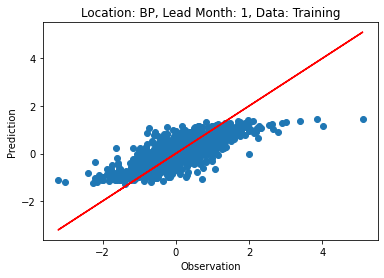

Location: BP
Persistence MSE: 0.4665
Test MSE: 0.3831
Persist CSI: 0.1875
Persist CSI 80: 0.2949
Test CSI: 0.1600
Test CSI 80: 0.2899


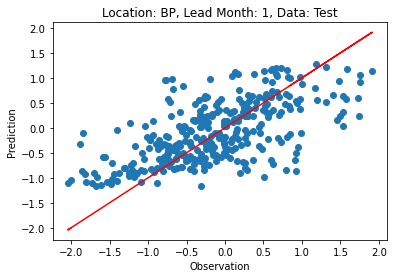

Location: BOP
90th Threshold: 1.1172504
80th Threshold: 0.72880715
Training Model 1
Epoch [20/400], Avg Loss: 4.8059,  Val MSE: 0.1903
Epoch [40/400], Avg Loss: 0.9705,  Val MSE: 0.1705
Epoch [60/400], Avg Loss: 0.5962,  Val MSE: 0.1585
Epoch [80/400], Avg Loss: 0.5190,  Val MSE: 0.1527
Epoch [100/400], Avg Loss: 0.4751,  Val MSE: 0.1501
Epoch [120/400], Avg Loss: 0.4490,  Val MSE: 0.1489
Epoch [140/400], Avg Loss: 0.4325,  Val MSE: 0.1487
Epoch [160/400], Avg Loss: 0.4196,  Val MSE: 0.1487
Epoch [180/400], Avg Loss: 0.4072,  Val MSE: 0.1490
Epoch [200/400], Avg Loss: 0.3963,  Val MSE: 0.1494
Epoch [220/400], Avg Loss: 0.3889,  Val MSE: 0.1496
Epoch [240/400], Avg Loss: 0.3837,  Val MSE: 0.1499
Epoch [260/400], Avg Loss: 0.3790,  Val MSE: 0.1502
Epoch [280/400], Avg Loss: 0.3747,  Val MSE: 0.1506
Epoch [300/400], Avg Loss: 0.3708,  Val MSE: 0.1510
Epoch [320/400], Avg Loss: 0.3673,  Val MSE: 0.1514
Epoch [340/400], Avg Loss: 0.3652,  Val MSE: 0.1517
Epoch [360/400], Avg Loss: 0.3636,  

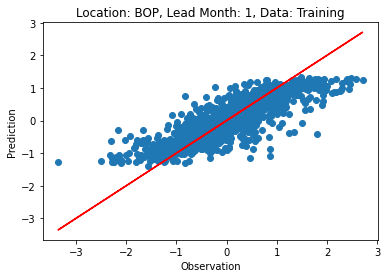

Training Model 2
Epoch [20/400], Avg Loss: 4.7818,  Val MSE: 0.1901
Epoch [40/400], Avg Loss: 1.0273,  Val MSE: 0.1750
Epoch [60/400], Avg Loss: 0.6225,  Val MSE: 0.1606
Epoch [80/400], Avg Loss: 0.5205,  Val MSE: 0.1525
Epoch [100/400], Avg Loss: 0.4660,  Val MSE: 0.1498
Epoch [120/400], Avg Loss: 0.4387,  Val MSE: 0.1490
Epoch [140/400], Avg Loss: 0.4222,  Val MSE: 0.1490
Epoch [160/400], Avg Loss: 0.4114,  Val MSE: 0.1492
Epoch [180/400], Avg Loss: 0.4031,  Val MSE: 0.1493
Epoch [200/400], Avg Loss: 0.3960,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3900,  Val MSE: 0.1497
Epoch [240/400], Avg Loss: 0.3845,  Val MSE: 0.1499
Epoch [260/400], Avg Loss: 0.3792,  Val MSE: 0.1501
Epoch [280/400], Avg Loss: 0.3752,  Val MSE: 0.1504
Epoch [300/400], Avg Loss: 0.3718,  Val MSE: 0.1507
Epoch [320/400], Avg Loss: 0.3683,  Val MSE: 0.1509
Epoch [340/400], Avg Loss: 0.3653,  Val MSE: 0.1513
Epoch [360/400], Avg Loss: 0.3632,  Val MSE: 0.1515
Epoch [380/400], Avg Loss: 0.3608,  Val MSE: 0.1518

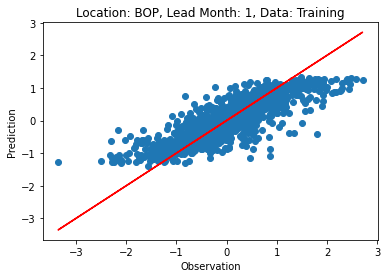

Training Model 3
Epoch [20/400], Avg Loss: 4.8212,  Val MSE: 0.1958
Epoch [40/400], Avg Loss: 1.0528,  Val MSE: 0.1766
Epoch [60/400], Avg Loss: 0.6045,  Val MSE: 0.1595
Epoch [80/400], Avg Loss: 0.5090,  Val MSE: 0.1525
Epoch [100/400], Avg Loss: 0.4652,  Val MSE: 0.1500
Epoch [120/400], Avg Loss: 0.4423,  Val MSE: 0.1490
Epoch [140/400], Avg Loss: 0.4267,  Val MSE: 0.1487
Epoch [160/400], Avg Loss: 0.4140,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4032,  Val MSE: 0.1493
Epoch [200/400], Avg Loss: 0.3946,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3891,  Val MSE: 0.1498
Epoch [240/400], Avg Loss: 0.3851,  Val MSE: 0.1502
Epoch [260/400], Avg Loss: 0.3818,  Val MSE: 0.1507
Epoch [280/400], Avg Loss: 0.3785,  Val MSE: 0.1511
Epoch [300/400], Avg Loss: 0.3748,  Val MSE: 0.1515
Epoch [320/400], Avg Loss: 0.3711,  Val MSE: 0.1520
Epoch [340/400], Avg Loss: 0.3679,  Val MSE: 0.1523
Epoch [360/400], Avg Loss: 0.3652,  Val MSE: 0.1525
Epoch [380/400], Avg Loss: 0.3629,  Val MSE: 0.1528

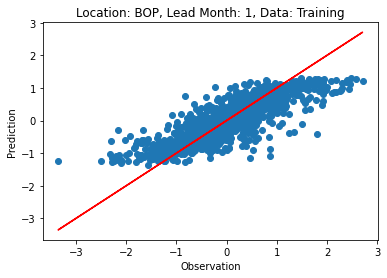

Training Model 4
Epoch [20/400], Avg Loss: 4.8105,  Val MSE: 0.2003
Epoch [40/400], Avg Loss: 1.0311,  Val MSE: 0.1770
Epoch [60/400], Avg Loss: 0.6078,  Val MSE: 0.1622
Epoch [80/400], Avg Loss: 0.5124,  Val MSE: 0.1536
Epoch [100/400], Avg Loss: 0.4702,  Val MSE: 0.1506
Epoch [120/400], Avg Loss: 0.4470,  Val MSE: 0.1494
Epoch [140/400], Avg Loss: 0.4314,  Val MSE: 0.1488
Epoch [160/400], Avg Loss: 0.4215,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4126,  Val MSE: 0.1492
Epoch [200/400], Avg Loss: 0.4043,  Val MSE: 0.1497
Epoch [220/400], Avg Loss: 0.3973,  Val MSE: 0.1500
Epoch [240/400], Avg Loss: 0.3910,  Val MSE: 0.1503
Epoch [260/400], Avg Loss: 0.3852,  Val MSE: 0.1508
Epoch [280/400], Avg Loss: 0.3806,  Val MSE: 0.1514
Epoch [300/400], Avg Loss: 0.3764,  Val MSE: 0.1518
Epoch [320/400], Avg Loss: 0.3725,  Val MSE: 0.1522
Epoch [340/400], Avg Loss: 0.3689,  Val MSE: 0.1525
Epoch [360/400], Avg Loss: 0.3661,  Val MSE: 0.1528
Epoch [380/400], Avg Loss: 0.3638,  Val MSE: 0.1531

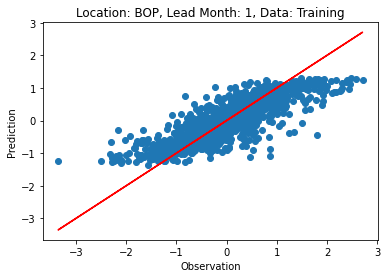

Training Model 5
Epoch [20/400], Avg Loss: 4.7665,  Val MSE: 0.1932
Epoch [40/400], Avg Loss: 1.0225,  Val MSE: 0.1761
Epoch [60/400], Avg Loss: 0.6167,  Val MSE: 0.1608
Epoch [80/400], Avg Loss: 0.5317,  Val MSE: 0.1535
Epoch [100/400], Avg Loss: 0.4869,  Val MSE: 0.1503
Epoch [120/400], Avg Loss: 0.4601,  Val MSE: 0.1491
Epoch [140/400], Avg Loss: 0.4389,  Val MSE: 0.1488
Epoch [160/400], Avg Loss: 0.4240,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4131,  Val MSE: 0.1492
Epoch [200/400], Avg Loss: 0.4046,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3969,  Val MSE: 0.1498
Epoch [240/400], Avg Loss: 0.3900,  Val MSE: 0.1501
Epoch [260/400], Avg Loss: 0.3839,  Val MSE: 0.1506
Epoch [280/400], Avg Loss: 0.3794,  Val MSE: 0.1510
Epoch [300/400], Avg Loss: 0.3757,  Val MSE: 0.1514
Epoch [320/400], Avg Loss: 0.3722,  Val MSE: 0.1518
Epoch [340/400], Avg Loss: 0.3689,  Val MSE: 0.1521
Epoch [360/400], Avg Loss: 0.3658,  Val MSE: 0.1524
Epoch [380/400], Avg Loss: 0.3632,  Val MSE: 0.1527

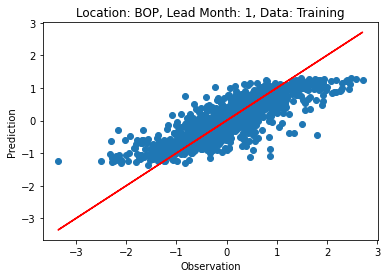

Location: BOP
Persistence MSE: 0.1690
Test MSE: 0.1528
Persist CSI: 0.3846
Persist CSI 80: 0.4717
Test CSI: 0.0357
Test CSI 80: 0.4211


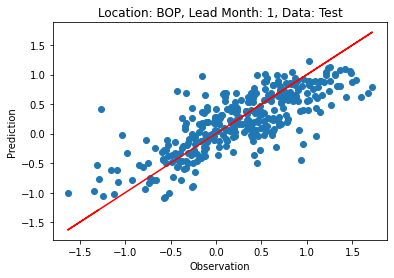

Location: W
90th Threshold: 1.331288
80th Threshold: 0.8579866
Training Model 1
Epoch [20/400], Avg Loss: 4.8997,  Val MSE: 0.5886
Epoch [40/400], Avg Loss: 1.0930,  Val MSE: 0.5087
Epoch [60/400], Avg Loss: 0.6988,  Val MSE: 0.4696
Epoch [80/400], Avg Loss: 0.6209,  Val MSE: 0.4589
Epoch [100/400], Avg Loss: 0.5899,  Val MSE: 0.4595
Epoch [120/400], Avg Loss: 0.5701,  Val MSE: 0.4646
Epoch [140/400], Avg Loss: 0.5572,  Val MSE: 0.4696
Epoch [160/400], Avg Loss: 0.5453,  Val MSE: 0.4753
Epoch [180/400], Avg Loss: 0.5340,  Val MSE: 0.4800
Epoch [200/400], Avg Loss: 0.5231,  Val MSE: 0.4848
Epoch [220/400], Avg Loss: 0.5130,  Val MSE: 0.4891
Epoch [240/400], Avg Loss: 0.5044,  Val MSE: 0.4917
Epoch [260/400], Avg Loss: 0.4973,  Val MSE: 0.4937
Epoch [280/400], Avg Loss: 0.4916,  Val MSE: 0.4953
Epoch [300/400], Avg Loss: 0.4870,  Val MSE: 0.4969
Epoch [320/400], Avg Loss: 0.4830,  Val MSE: 0.4986
Epoch [340/400], Avg Loss: 0.4788,  Val MSE: 0.5003
Epoch [360/400], Avg Loss: 0.4743,  Val 

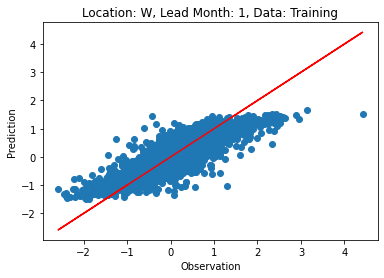

Training Model 2
Epoch [20/400], Avg Loss: 4.9133,  Val MSE: 0.5857
Epoch [40/400], Avg Loss: 1.1319,  Val MSE: 0.5181
Epoch [60/400], Avg Loss: 0.7423,  Val MSE: 0.4777
Epoch [80/400], Avg Loss: 0.6482,  Val MSE: 0.4674
Epoch [100/400], Avg Loss: 0.5958,  Val MSE: 0.4695
Epoch [120/400], Avg Loss: 0.5643,  Val MSE: 0.4737
Epoch [140/400], Avg Loss: 0.5430,  Val MSE: 0.4782
Epoch [160/400], Avg Loss: 0.5269,  Val MSE: 0.4829
Epoch [180/400], Avg Loss: 0.5139,  Val MSE: 0.4869
Epoch [200/400], Avg Loss: 0.5050,  Val MSE: 0.4909
Epoch [220/400], Avg Loss: 0.4970,  Val MSE: 0.4951
Epoch [240/400], Avg Loss: 0.4907,  Val MSE: 0.4995
Epoch [260/400], Avg Loss: 0.4862,  Val MSE: 0.5030
Epoch [280/400], Avg Loss: 0.4834,  Val MSE: 0.5063
Epoch [300/400], Avg Loss: 0.4811,  Val MSE: 0.5092
Epoch [320/400], Avg Loss: 0.4792,  Val MSE: 0.5121
Epoch [340/400], Avg Loss: 0.4775,  Val MSE: 0.5149
Epoch [360/400], Avg Loss: 0.4761,  Val MSE: 0.5171
Epoch [380/400], Avg Loss: 0.4745,  Val MSE: 0.5180

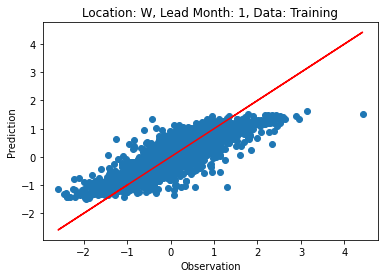

Training Model 3
Epoch [20/400], Avg Loss: 4.8950,  Val MSE: 0.5889
Epoch [40/400], Avg Loss: 1.1229,  Val MSE: 0.5158
Epoch [60/400], Avg Loss: 0.7041,  Val MSE: 0.4792
Epoch [80/400], Avg Loss: 0.6161,  Val MSE: 0.4749
Epoch [100/400], Avg Loss: 0.5814,  Val MSE: 0.4790
Epoch [120/400], Avg Loss: 0.5614,  Val MSE: 0.4828
Epoch [140/400], Avg Loss: 0.5476,  Val MSE: 0.4871
Epoch [160/400], Avg Loss: 0.5362,  Val MSE: 0.4910
Epoch [180/400], Avg Loss: 0.5254,  Val MSE: 0.4941
Epoch [200/400], Avg Loss: 0.5162,  Val MSE: 0.4978
Epoch [220/400], Avg Loss: 0.5072,  Val MSE: 0.5008
Epoch [240/400], Avg Loss: 0.4991,  Val MSE: 0.5025
Epoch [260/400], Avg Loss: 0.4931,  Val MSE: 0.5040
Epoch [280/400], Avg Loss: 0.4883,  Val MSE: 0.5050
Epoch [300/400], Avg Loss: 0.4842,  Val MSE: 0.5059
Epoch [320/400], Avg Loss: 0.4808,  Val MSE: 0.5066
Epoch [340/400], Avg Loss: 0.4778,  Val MSE: 0.5073
Epoch [360/400], Avg Loss: 0.4751,  Val MSE: 0.5079
Epoch [380/400], Avg Loss: 0.4724,  Val MSE: 0.5085

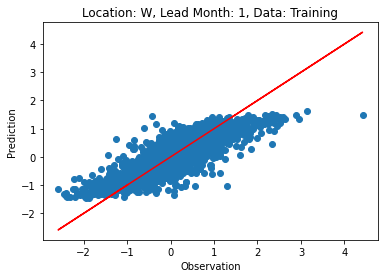

Training Model 4
Epoch [20/400], Avg Loss: 4.9464,  Val MSE: 0.5736
Epoch [40/400], Avg Loss: 1.1135,  Val MSE: 0.5090
Epoch [60/400], Avg Loss: 0.7192,  Val MSE: 0.4730
Epoch [80/400], Avg Loss: 0.6365,  Val MSE: 0.4624
Epoch [100/400], Avg Loss: 0.5946,  Val MSE: 0.4655
Epoch [120/400], Avg Loss: 0.5667,  Val MSE: 0.4713
Epoch [140/400], Avg Loss: 0.5488,  Val MSE: 0.4766
Epoch [160/400], Avg Loss: 0.5350,  Val MSE: 0.4806
Epoch [180/400], Avg Loss: 0.5245,  Val MSE: 0.4847
Epoch [200/400], Avg Loss: 0.5154,  Val MSE: 0.4888
Epoch [220/400], Avg Loss: 0.5080,  Val MSE: 0.4925
Epoch [240/400], Avg Loss: 0.5027,  Val MSE: 0.4952
Epoch [260/400], Avg Loss: 0.4986,  Val MSE: 0.4977
Epoch [280/400], Avg Loss: 0.4944,  Val MSE: 0.4999
Epoch [300/400], Avg Loss: 0.4897,  Val MSE: 0.5023
Epoch [320/400], Avg Loss: 0.4846,  Val MSE: 0.5044
Epoch [340/400], Avg Loss: 0.4805,  Val MSE: 0.5064
Epoch [360/400], Avg Loss: 0.4764,  Val MSE: 0.5083
Epoch [380/400], Avg Loss: 0.4736,  Val MSE: 0.5100

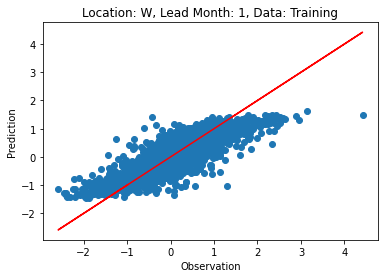

Training Model 5
Epoch [20/400], Avg Loss: 4.9896,  Val MSE: 0.5758
Epoch [40/400], Avg Loss: 1.1368,  Val MSE: 0.5190
Epoch [60/400], Avg Loss: 0.7175,  Val MSE: 0.4787
Epoch [80/400], Avg Loss: 0.6184,  Val MSE: 0.4696
Epoch [100/400], Avg Loss: 0.5746,  Val MSE: 0.4742
Epoch [120/400], Avg Loss: 0.5474,  Val MSE: 0.4794
Epoch [140/400], Avg Loss: 0.5302,  Val MSE: 0.4827
Epoch [160/400], Avg Loss: 0.5187,  Val MSE: 0.4858
Epoch [180/400], Avg Loss: 0.5112,  Val MSE: 0.4884
Epoch [200/400], Avg Loss: 0.5057,  Val MSE: 0.4907
Epoch [220/400], Avg Loss: 0.5017,  Val MSE: 0.4932
Epoch [240/400], Avg Loss: 0.4985,  Val MSE: 0.4953
Epoch [260/400], Avg Loss: 0.4953,  Val MSE: 0.4978
Epoch [280/400], Avg Loss: 0.4923,  Val MSE: 0.5003
Epoch [300/400], Avg Loss: 0.4890,  Val MSE: 0.5026
Epoch [320/400], Avg Loss: 0.4851,  Val MSE: 0.5048
Epoch [340/400], Avg Loss: 0.4809,  Val MSE: 0.5065
Epoch [360/400], Avg Loss: 0.4773,  Val MSE: 0.5082
Epoch [380/400], Avg Loss: 0.4738,  Val MSE: 0.5099

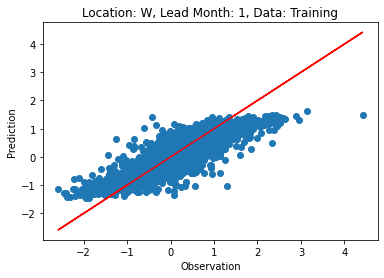

Location: W
Persistence MSE: 0.4578
Test MSE: 0.5109
Persist CSI: 0.4607
Persist CSI 80: 0.5541
Test CSI: 0.2500
Test CSI 80: 0.4789


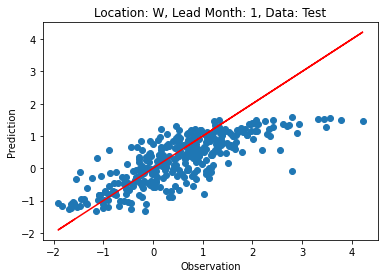

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.71359485
Training Model 1
Epoch [20/400], Avg Loss: 4.8810,  Val MSE: 0.3531
Epoch [40/400], Avg Loss: 1.0161,  Val MSE: 0.3181
Epoch [60/400], Avg Loss: 0.6451,  Val MSE: 0.3072
Epoch [80/400], Avg Loss: 0.5686,  Val MSE: 0.2998
Epoch [100/400], Avg Loss: 0.5293,  Val MSE: 0.2980
Epoch [120/400], Avg Loss: 0.5050,  Val MSE: 0.3000
Epoch [140/400], Avg Loss: 0.4883,  Val MSE: 0.3030
Epoch [160/400], Avg Loss: 0.4748,  Val MSE: 0.3055
Epoch [180/400], Avg Loss: 0.4650,  Val MSE: 0.3077
Epoch [200/400], Avg Loss: 0.4557,  Val MSE: 0.3097
Epoch [220/400], Avg Loss: 0.4467,  Val MSE: 0.3113
Epoch [240/400], Avg Loss: 0.4391,  Val MSE: 0.3124
Epoch [260/400], Avg Loss: 0.4329,  Val MSE: 0.3132
Epoch [280/400], Avg Loss: 0.4296,  Val MSE: 0.3136
Epoch [300/400], Avg Loss: 0.4281,  Val MSE: 0.3140
Epoch [320/400], Avg Loss: 0.4271,  Val MSE: 0.3147
Epoch [340/400], Avg Loss: 0.4261,  Val MSE: 0.3155
Epoch [360/400], Avg Loss: 0.4243,  Va

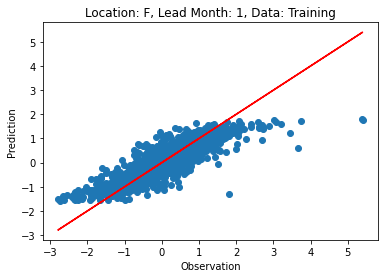

Training Model 2
Epoch [20/400], Avg Loss: 4.8558,  Val MSE: 0.3495
Epoch [40/400], Avg Loss: 1.0624,  Val MSE: 0.3195
Epoch [60/400], Avg Loss: 0.6813,  Val MSE: 0.3093
Epoch [80/400], Avg Loss: 0.5896,  Val MSE: 0.3011
Epoch [100/400], Avg Loss: 0.5461,  Val MSE: 0.2970
Epoch [120/400], Avg Loss: 0.5254,  Val MSE: 0.2975
Epoch [140/400], Avg Loss: 0.5087,  Val MSE: 0.2996
Epoch [160/400], Avg Loss: 0.4949,  Val MSE: 0.3021
Epoch [180/400], Avg Loss: 0.4826,  Val MSE: 0.3042
Epoch [200/400], Avg Loss: 0.4726,  Val MSE: 0.3056
Epoch [220/400], Avg Loss: 0.4655,  Val MSE: 0.3067
Epoch [240/400], Avg Loss: 0.4612,  Val MSE: 0.3075
Epoch [260/400], Avg Loss: 0.4574,  Val MSE: 0.3080
Epoch [280/400], Avg Loss: 0.4535,  Val MSE: 0.3090
Epoch [300/400], Avg Loss: 0.4504,  Val MSE: 0.3099
Epoch [320/400], Avg Loss: 0.4475,  Val MSE: 0.3107
Epoch [340/400], Avg Loss: 0.4452,  Val MSE: 0.3114
Epoch [360/400], Avg Loss: 0.4427,  Val MSE: 0.3124
Epoch [380/400], Avg Loss: 0.4408,  Val MSE: 0.3131

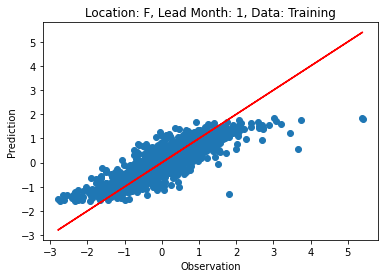

Training Model 3
Epoch [20/400], Avg Loss: 4.8256,  Val MSE: 0.3510
Epoch [40/400], Avg Loss: 1.0584,  Val MSE: 0.3224
Epoch [60/400], Avg Loss: 0.6670,  Val MSE: 0.3090
Epoch [80/400], Avg Loss: 0.5878,  Val MSE: 0.3014
Epoch [100/400], Avg Loss: 0.5421,  Val MSE: 0.2979
Epoch [120/400], Avg Loss: 0.5109,  Val MSE: 0.2976
Epoch [140/400], Avg Loss: 0.4918,  Val MSE: 0.3006
Epoch [160/400], Avg Loss: 0.4785,  Val MSE: 0.3043
Epoch [180/400], Avg Loss: 0.4679,  Val MSE: 0.3067
Epoch [200/400], Avg Loss: 0.4600,  Val MSE: 0.3083
Epoch [220/400], Avg Loss: 0.4531,  Val MSE: 0.3097
Epoch [240/400], Avg Loss: 0.4467,  Val MSE: 0.3109
Epoch [260/400], Avg Loss: 0.4422,  Val MSE: 0.3120
Epoch [280/400], Avg Loss: 0.4389,  Val MSE: 0.3128
Epoch [300/400], Avg Loss: 0.4353,  Val MSE: 0.3136
Epoch [320/400], Avg Loss: 0.4329,  Val MSE: 0.3141
Epoch [340/400], Avg Loss: 0.4313,  Val MSE: 0.3146
Epoch [360/400], Avg Loss: 0.4292,  Val MSE: 0.3149
Epoch [380/400], Avg Loss: 0.4267,  Val MSE: 0.3154

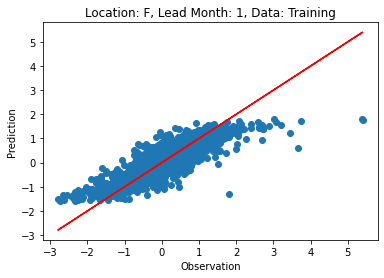

Training Model 4
Epoch [20/400], Avg Loss: 4.8424,  Val MSE: 0.3616
Epoch [40/400], Avg Loss: 1.0472,  Val MSE: 0.3201
Epoch [60/400], Avg Loss: 0.6689,  Val MSE: 0.3070
Epoch [80/400], Avg Loss: 0.5805,  Val MSE: 0.2997
Epoch [100/400], Avg Loss: 0.5341,  Val MSE: 0.2988
Epoch [120/400], Avg Loss: 0.5065,  Val MSE: 0.3013
Epoch [140/400], Avg Loss: 0.4886,  Val MSE: 0.3039
Epoch [160/400], Avg Loss: 0.4751,  Val MSE: 0.3057
Epoch [180/400], Avg Loss: 0.4653,  Val MSE: 0.3072
Epoch [200/400], Avg Loss: 0.4571,  Val MSE: 0.3084
Epoch [220/400], Avg Loss: 0.4501,  Val MSE: 0.3096
Epoch [240/400], Avg Loss: 0.4441,  Val MSE: 0.3106
Epoch [260/400], Avg Loss: 0.4387,  Val MSE: 0.3114
Epoch [280/400], Avg Loss: 0.4339,  Val MSE: 0.3120
Epoch [300/400], Avg Loss: 0.4303,  Val MSE: 0.3124
Epoch [320/400], Avg Loss: 0.4273,  Val MSE: 0.3129
Epoch [340/400], Avg Loss: 0.4250,  Val MSE: 0.3129
Epoch [360/400], Avg Loss: 0.4233,  Val MSE: 0.3132
Epoch [380/400], Avg Loss: 0.4223,  Val MSE: 0.3133

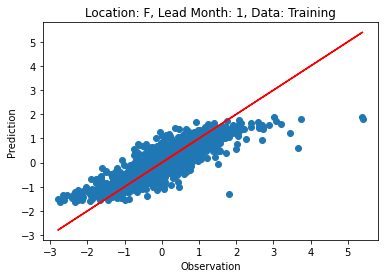

Training Model 5
Epoch [20/400], Avg Loss: 4.9115,  Val MSE: 0.3445
Epoch [40/400], Avg Loss: 1.0781,  Val MSE: 0.3221
Epoch [60/400], Avg Loss: 0.6787,  Val MSE: 0.3073
Epoch [80/400], Avg Loss: 0.5924,  Val MSE: 0.2998
Epoch [100/400], Avg Loss: 0.5475,  Val MSE: 0.2980
Epoch [120/400], Avg Loss: 0.5142,  Val MSE: 0.2990
Epoch [140/400], Avg Loss: 0.4930,  Val MSE: 0.3015
Epoch [160/400], Avg Loss: 0.4824,  Val MSE: 0.3039
Epoch [180/400], Avg Loss: 0.4755,  Val MSE: 0.3057
Epoch [200/400], Avg Loss: 0.4700,  Val MSE: 0.3075
Epoch [220/400], Avg Loss: 0.4642,  Val MSE: 0.3091
Epoch [240/400], Avg Loss: 0.4586,  Val MSE: 0.3103
Epoch [260/400], Avg Loss: 0.4537,  Val MSE: 0.3114
Epoch [280/400], Avg Loss: 0.4491,  Val MSE: 0.3124
Epoch [300/400], Avg Loss: 0.4448,  Val MSE: 0.3133
Epoch [320/400], Avg Loss: 0.4407,  Val MSE: 0.3140
Epoch [340/400], Avg Loss: 0.4369,  Val MSE: 0.3144
Epoch [360/400], Avg Loss: 0.4340,  Val MSE: 0.3148
Epoch [380/400], Avg Loss: 0.4317,  Val MSE: 0.3155

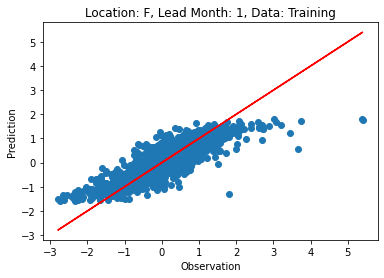

Location: F
Persistence MSE: 0.3402
Test MSE: 0.3150
Persist CSI: 0.4699
Persist CSI 80: 0.5500
Test CSI: 0.3611
Test CSI 80: 0.5752


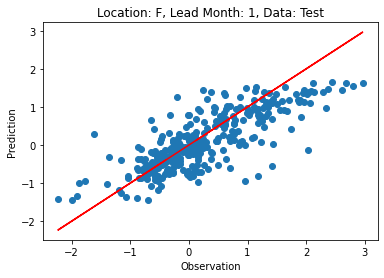

Location: CI
90th Threshold: 1.3186705
80th Threshold: 0.7413428
Training Model 1
Epoch [20/400], Avg Loss: 4.8124,  Val MSE: 0.3304
Epoch [40/400], Avg Loss: 1.0491,  Val MSE: 0.2805
Epoch [60/400], Avg Loss: 0.6186,  Val MSE: 0.2645
Epoch [80/400], Avg Loss: 0.5313,  Val MSE: 0.2596
Epoch [100/400], Avg Loss: 0.4901,  Val MSE: 0.2567
Epoch [120/400], Avg Loss: 0.4675,  Val MSE: 0.2551
Epoch [140/400], Avg Loss: 0.4526,  Val MSE: 0.2546
Epoch [160/400], Avg Loss: 0.4416,  Val MSE: 0.2547
Epoch [180/400], Avg Loss: 0.4329,  Val MSE: 0.2548
Epoch [200/400], Avg Loss: 0.4259,  Val MSE: 0.2552
Epoch [220/400], Avg Loss: 0.4191,  Val MSE: 0.2555
Epoch [240/400], Avg Loss: 0.4136,  Val MSE: 0.2558
Epoch [260/400], Avg Loss: 0.4102,  Val MSE: 0.2563
Epoch [280/400], Avg Loss: 0.4075,  Val MSE: 0.2566
Epoch [300/400], Avg Loss: 0.4052,  Val MSE: 0.2571
Epoch [320/400], Avg Loss: 0.4034,  Val MSE: 0.2578
Epoch [340/400], Avg Loss: 0.4014,  Val MSE: 0.2582
Epoch [360/400], Avg Loss: 0.3994,  Va

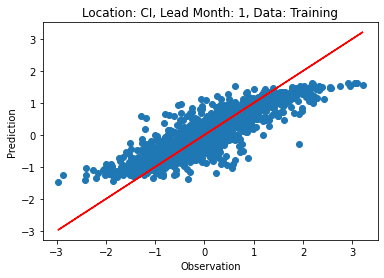

Training Model 2
Epoch [20/400], Avg Loss: 4.8363,  Val MSE: 0.3274
Epoch [40/400], Avg Loss: 1.0344,  Val MSE: 0.2825
Epoch [60/400], Avg Loss: 0.6268,  Val MSE: 0.2646
Epoch [80/400], Avg Loss: 0.5355,  Val MSE: 0.2610
Epoch [100/400], Avg Loss: 0.4911,  Val MSE: 0.2584
Epoch [120/400], Avg Loss: 0.4661,  Val MSE: 0.2566
Epoch [140/400], Avg Loss: 0.4539,  Val MSE: 0.2556
Epoch [160/400], Avg Loss: 0.4449,  Val MSE: 0.2556
Epoch [180/400], Avg Loss: 0.4371,  Val MSE: 0.2559
Epoch [200/400], Avg Loss: 0.4293,  Val MSE: 0.2566
Epoch [220/400], Avg Loss: 0.4215,  Val MSE: 0.2571
Epoch [240/400], Avg Loss: 0.4143,  Val MSE: 0.2576
Epoch [260/400], Avg Loss: 0.4081,  Val MSE: 0.2580
Epoch [280/400], Avg Loss: 0.4025,  Val MSE: 0.2582
Epoch [300/400], Avg Loss: 0.3983,  Val MSE: 0.2584
Epoch [320/400], Avg Loss: 0.3953,  Val MSE: 0.2586
Epoch [340/400], Avg Loss: 0.3936,  Val MSE: 0.2588
Epoch [360/400], Avg Loss: 0.3926,  Val MSE: 0.2589
Epoch [380/400], Avg Loss: 0.3919,  Val MSE: 0.2592

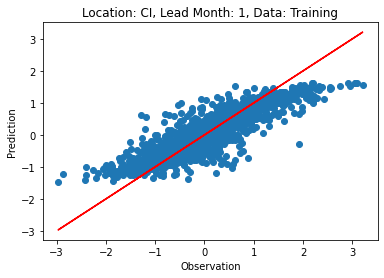

Training Model 3
Epoch [20/400], Avg Loss: 4.8063,  Val MSE: 0.3390
Epoch [40/400], Avg Loss: 0.9881,  Val MSE: 0.2782
Epoch [60/400], Avg Loss: 0.5867,  Val MSE: 0.2646
Epoch [80/400], Avg Loss: 0.5146,  Val MSE: 0.2603
Epoch [100/400], Avg Loss: 0.4818,  Val MSE: 0.2578
Epoch [120/400], Avg Loss: 0.4641,  Val MSE: 0.2562
Epoch [140/400], Avg Loss: 0.4523,  Val MSE: 0.2556
Epoch [160/400], Avg Loss: 0.4428,  Val MSE: 0.2557
Epoch [180/400], Avg Loss: 0.4342,  Val MSE: 0.2561
Epoch [200/400], Avg Loss: 0.4275,  Val MSE: 0.2564
Epoch [220/400], Avg Loss: 0.4215,  Val MSE: 0.2563
Epoch [240/400], Avg Loss: 0.4167,  Val MSE: 0.2564
Epoch [260/400], Avg Loss: 0.4128,  Val MSE: 0.2567
Epoch [280/400], Avg Loss: 0.4098,  Val MSE: 0.2571
Epoch [300/400], Avg Loss: 0.4067,  Val MSE: 0.2575
Epoch [320/400], Avg Loss: 0.4040,  Val MSE: 0.2578
Epoch [340/400], Avg Loss: 0.4013,  Val MSE: 0.2582
Epoch [360/400], Avg Loss: 0.3989,  Val MSE: 0.2586
Epoch [380/400], Avg Loss: 0.3968,  Val MSE: 0.2588

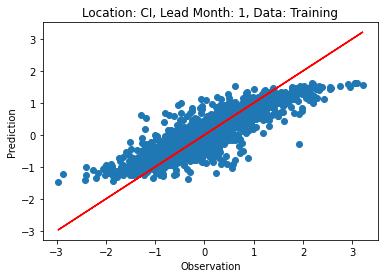

Training Model 4
Epoch [20/400], Avg Loss: 4.8485,  Val MSE: 0.3282
Epoch [40/400], Avg Loss: 1.0675,  Val MSE: 0.2822
Epoch [60/400], Avg Loss: 0.6472,  Val MSE: 0.2645
Epoch [80/400], Avg Loss: 0.5567,  Val MSE: 0.2604
Epoch [100/400], Avg Loss: 0.5136,  Val MSE: 0.2575
Epoch [120/400], Avg Loss: 0.4861,  Val MSE: 0.2559
Epoch [140/400], Avg Loss: 0.4668,  Val MSE: 0.2553
Epoch [160/400], Avg Loss: 0.4536,  Val MSE: 0.2552
Epoch [180/400], Avg Loss: 0.4432,  Val MSE: 0.2555
Epoch [200/400], Avg Loss: 0.4357,  Val MSE: 0.2560
Epoch [220/400], Avg Loss: 0.4298,  Val MSE: 0.2566
Epoch [240/400], Avg Loss: 0.4242,  Val MSE: 0.2570
Epoch [260/400], Avg Loss: 0.4182,  Val MSE: 0.2575
Epoch [280/400], Avg Loss: 0.4128,  Val MSE: 0.2581
Epoch [300/400], Avg Loss: 0.4073,  Val MSE: 0.2584
Epoch [320/400], Avg Loss: 0.4029,  Val MSE: 0.2585
Epoch [340/400], Avg Loss: 0.3995,  Val MSE: 0.2585
Epoch [360/400], Avg Loss: 0.3966,  Val MSE: 0.2586
Epoch [380/400], Avg Loss: 0.3934,  Val MSE: 0.2588

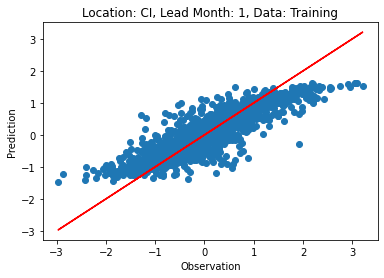

Training Model 5
Epoch [20/400], Avg Loss: 4.8482,  Val MSE: 0.3261
Epoch [40/400], Avg Loss: 1.0329,  Val MSE: 0.2797
Epoch [60/400], Avg Loss: 0.6291,  Val MSE: 0.2653
Epoch [80/400], Avg Loss: 0.5411,  Val MSE: 0.2611
Epoch [100/400], Avg Loss: 0.4967,  Val MSE: 0.2585
Epoch [120/400], Avg Loss: 0.4701,  Val MSE: 0.2570
Epoch [140/400], Avg Loss: 0.4524,  Val MSE: 0.2563
Epoch [160/400], Avg Loss: 0.4397,  Val MSE: 0.2565
Epoch [180/400], Avg Loss: 0.4312,  Val MSE: 0.2565
Epoch [200/400], Avg Loss: 0.4236,  Val MSE: 0.2569
Epoch [220/400], Avg Loss: 0.4176,  Val MSE: 0.2574
Epoch [240/400], Avg Loss: 0.4127,  Val MSE: 0.2578
Epoch [260/400], Avg Loss: 0.4087,  Val MSE: 0.2583
Epoch [280/400], Avg Loss: 0.4047,  Val MSE: 0.2586
Epoch [300/400], Avg Loss: 0.4009,  Val MSE: 0.2588
Epoch [320/400], Avg Loss: 0.3973,  Val MSE: 0.2591
Epoch [340/400], Avg Loss: 0.3939,  Val MSE: 0.2593
Epoch [360/400], Avg Loss: 0.3910,  Val MSE: 0.2594
Epoch [380/400], Avg Loss: 0.3887,  Val MSE: 0.2597

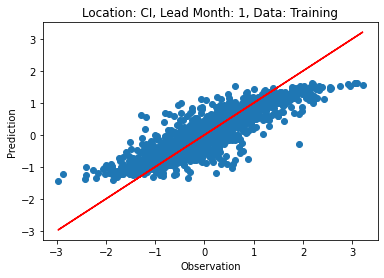

Location: CI
Persistence MSE: 0.3095
Test MSE: 0.2592
Persist CSI: 0.2174
Persist CSI 80: 0.4211
Test CSI: 0.1765
Test CSI 80: 0.3824


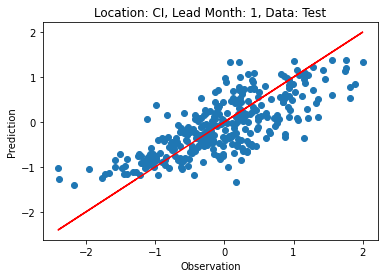

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.71098405
Training Model 1
Epoch [20/400], Avg Loss: 4.7535,  Val MSE: 0.2891
Epoch [40/400], Avg Loss: 0.9840,  Val MSE: 0.2617
Epoch [60/400], Avg Loss: 0.5949,  Val MSE: 0.2435
Epoch [80/400], Avg Loss: 0.5222,  Val MSE: 0.2371
Epoch [100/400], Avg Loss: 0.4879,  Val MSE: 0.2347
Epoch [120/400], Avg Loss: 0.4654,  Val MSE: 0.2338
Epoch [140/400], Avg Loss: 0.4494,  Val MSE: 0.2336
Epoch [160/400], Avg Loss: 0.4383,  Val MSE: 0.2332
Epoch [180/400], Avg Loss: 0.4292,  Val MSE: 0.2331
Epoch [200/400], Avg Loss: 0.4217,  Val MSE: 0.2330
Epoch [220/400], Avg Loss: 0.4158,  Val MSE: 0.2329
Epoch [240/400], Avg Loss: 0.4109,  Val MSE: 0.2330
Epoch [260/400], Avg Loss: 0.4062,  Val MSE: 0.2332
Epoch [280/400], Avg Loss: 0.4025,  Val MSE: 0.2332
Epoch [300/400], Avg Loss: 0.3996,  Val MSE: 0.2335
Epoch [320/400], Avg Loss: 0.3977,  Val MSE: 0.2336
Epoch [340/400], Avg Loss: 0.3963,  Val MSE: 0.2337
Epoch [360/400], Avg Loss: 0.3952,  V

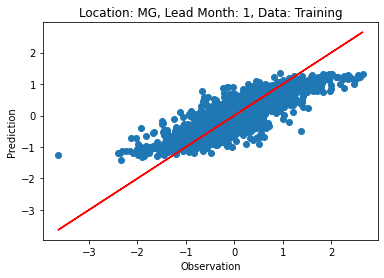

Training Model 2
Epoch [20/400], Avg Loss: 4.8153,  Val MSE: 0.2804
Epoch [40/400], Avg Loss: 0.9950,  Val MSE: 0.2600
Epoch [60/400], Avg Loss: 0.6142,  Val MSE: 0.2441
Epoch [80/400], Avg Loss: 0.5280,  Val MSE: 0.2377
Epoch [100/400], Avg Loss: 0.4852,  Val MSE: 0.2351
Epoch [120/400], Avg Loss: 0.4598,  Val MSE: 0.2339
Epoch [140/400], Avg Loss: 0.4433,  Val MSE: 0.2334
Epoch [160/400], Avg Loss: 0.4320,  Val MSE: 0.2335
Epoch [180/400], Avg Loss: 0.4223,  Val MSE: 0.2338
Epoch [200/400], Avg Loss: 0.4144,  Val MSE: 0.2339
Epoch [220/400], Avg Loss: 0.4072,  Val MSE: 0.2341
Epoch [240/400], Avg Loss: 0.4011,  Val MSE: 0.2343
Epoch [260/400], Avg Loss: 0.3952,  Val MSE: 0.2344
Epoch [280/400], Avg Loss: 0.3903,  Val MSE: 0.2345
Epoch [300/400], Avg Loss: 0.3866,  Val MSE: 0.2346
Epoch [320/400], Avg Loss: 0.3844,  Val MSE: 0.2347
Epoch [340/400], Avg Loss: 0.3823,  Val MSE: 0.2347
Epoch [360/400], Avg Loss: 0.3798,  Val MSE: 0.2348
Epoch [380/400], Avg Loss: 0.3771,  Val MSE: 0.2349

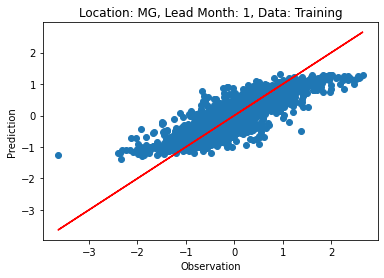

Training Model 3
Epoch [20/400], Avg Loss: 4.7796,  Val MSE: 0.2875
Epoch [40/400], Avg Loss: 1.0172,  Val MSE: 0.2600
Epoch [60/400], Avg Loss: 0.6231,  Val MSE: 0.2448
Epoch [80/400], Avg Loss: 0.5343,  Val MSE: 0.2379
Epoch [100/400], Avg Loss: 0.4968,  Val MSE: 0.2351
Epoch [120/400], Avg Loss: 0.4750,  Val MSE: 0.2337
Epoch [140/400], Avg Loss: 0.4579,  Val MSE: 0.2330
Epoch [160/400], Avg Loss: 0.4460,  Val MSE: 0.2327
Epoch [180/400], Avg Loss: 0.4361,  Val MSE: 0.2326
Epoch [200/400], Avg Loss: 0.4283,  Val MSE: 0.2328
Epoch [220/400], Avg Loss: 0.4213,  Val MSE: 0.2331
Epoch [240/400], Avg Loss: 0.4152,  Val MSE: 0.2333
Epoch [260/400], Avg Loss: 0.4104,  Val MSE: 0.2334
Epoch [280/400], Avg Loss: 0.4060,  Val MSE: 0.2336
Epoch [300/400], Avg Loss: 0.4016,  Val MSE: 0.2337
Epoch [320/400], Avg Loss: 0.3973,  Val MSE: 0.2340
Epoch [340/400], Avg Loss: 0.3929,  Val MSE: 0.2342
Epoch [360/400], Avg Loss: 0.3897,  Val MSE: 0.2342
Epoch [380/400], Avg Loss: 0.3868,  Val MSE: 0.2343

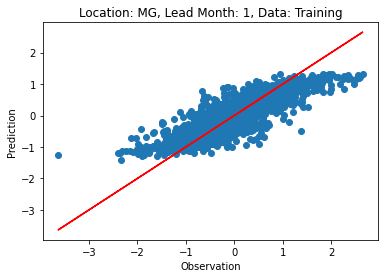

Training Model 4
Epoch [20/400], Avg Loss: 4.7903,  Val MSE: 0.2939
Epoch [40/400], Avg Loss: 1.0316,  Val MSE: 0.2674
Epoch [60/400], Avg Loss: 0.6282,  Val MSE: 0.2471
Epoch [80/400], Avg Loss: 0.5318,  Val MSE: 0.2389
Epoch [100/400], Avg Loss: 0.4851,  Val MSE: 0.2360
Epoch [120/400], Avg Loss: 0.4557,  Val MSE: 0.2344
Epoch [140/400], Avg Loss: 0.4354,  Val MSE: 0.2335
Epoch [160/400], Avg Loss: 0.4222,  Val MSE: 0.2333
Epoch [180/400], Avg Loss: 0.4140,  Val MSE: 0.2333
Epoch [200/400], Avg Loss: 0.4090,  Val MSE: 0.2335
Epoch [220/400], Avg Loss: 0.4051,  Val MSE: 0.2338
Epoch [240/400], Avg Loss: 0.4014,  Val MSE: 0.2341
Epoch [260/400], Avg Loss: 0.3974,  Val MSE: 0.2344
Epoch [280/400], Avg Loss: 0.3938,  Val MSE: 0.2345
Epoch [300/400], Avg Loss: 0.3909,  Val MSE: 0.2346
Epoch [320/400], Avg Loss: 0.3877,  Val MSE: 0.2348
Epoch [340/400], Avg Loss: 0.3848,  Val MSE: 0.2350
Epoch [360/400], Avg Loss: 0.3824,  Val MSE: 0.2350
Epoch [380/400], Avg Loss: 0.3808,  Val MSE: 0.2351

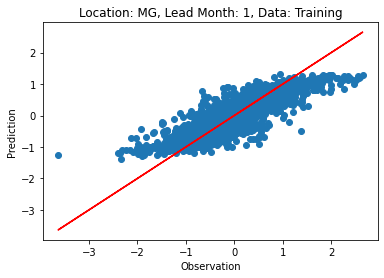

Training Model 5
Epoch [20/400], Avg Loss: 4.8066,  Val MSE: 0.2868
Epoch [40/400], Avg Loss: 0.9825,  Val MSE: 0.2599
Epoch [60/400], Avg Loss: 0.5793,  Val MSE: 0.2441
Epoch [80/400], Avg Loss: 0.5001,  Val MSE: 0.2374
Epoch [100/400], Avg Loss: 0.4637,  Val MSE: 0.2351
Epoch [120/400], Avg Loss: 0.4422,  Val MSE: 0.2336
Epoch [140/400], Avg Loss: 0.4269,  Val MSE: 0.2334
Epoch [160/400], Avg Loss: 0.4151,  Val MSE: 0.2334
Epoch [180/400], Avg Loss: 0.4070,  Val MSE: 0.2336
Epoch [200/400], Avg Loss: 0.4008,  Val MSE: 0.2341
Epoch [220/400], Avg Loss: 0.3972,  Val MSE: 0.2345
Epoch [240/400], Avg Loss: 0.3947,  Val MSE: 0.2348
Epoch [260/400], Avg Loss: 0.3923,  Val MSE: 0.2351
Epoch [280/400], Avg Loss: 0.3904,  Val MSE: 0.2354
Epoch [300/400], Avg Loss: 0.3888,  Val MSE: 0.2357
Epoch [320/400], Avg Loss: 0.3871,  Val MSE: 0.2359
Epoch [340/400], Avg Loss: 0.3854,  Val MSE: 0.2361
Epoch [360/400], Avg Loss: 0.3842,  Val MSE: 0.2361
Epoch [380/400], Avg Loss: 0.3832,  Val MSE: 0.2363

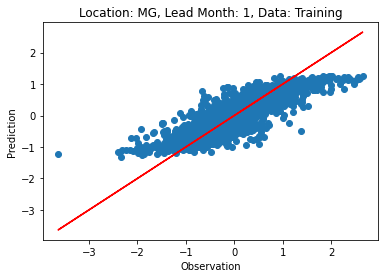

Location: MG
Persistence MSE: 0.2668
Test MSE: 0.2349
Persist CSI: 0.4386
Persist CSI 80: 0.3750
Test CSI: 0.2045
Test CSI 80: 0.3832


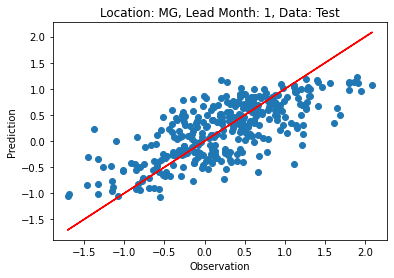

In [42]:
net_class = 'FCN'
num_layer = 2
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [1]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1

    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        all_preds = []
        all_time = []

        print('Location:', loc.upper())
        
        for model_num in range(5):

            y = nz[loc]
            y_all = y

            x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
            y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
            x_all = np.swapaxes(x_all, 1, 2)
            x_all_flat = np.array(x_all).reshape(-1, num_var*6)
            y_all = np.array(y_all)

            num_train = int(len(x_all) * train_split)
            x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
            x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

            # The threshold for defining outliers using the 90th percentile
            y_train_sorted = np.sort(y_train.numpy().squeeze())
            threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
            threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
            if model_num == 0:
                print('90th Threshold:', threshold)
                print('80th Threshold:', threshold_low)

            model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            criterion = nn.MSELoss()
            criterion_test = nn.MSELoss()

            print('Training Model {}'.format(model_num+1))

            # Start time
            start = time.time()

            for epoch in range(num_train_epochs):
                epoch_loss = 0
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    y_pred = model(x_batch)

                    loss = criterion(y_pred, y_batch)
                    
                    # Elastic Net Reg
                    # l1_ratio = 0 is the L2 reg.
                    # l1_ratio = 1 is the L1 reg.
                    l1_reg = 0.0
                    l2_reg = 0.0
                    for param in model.parameters():
                        l1_reg += torch.norm(param, 1)
                        l2_reg += torch.norm(param, 2)
                    loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                    optim.zero_grad()
                    loss.backward()
                    optim.step()
                    if (epoch+1) % 20 == 0:
                        #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                        epoch_loss += loss.item()
                with torch.no_grad():
                    y_pred = model(x_test)
                    val_mse = criterion_test(y_pred, y_test)     
                if (epoch+1) % 20 == 0:
                    epoch_loss /= len(x_train) // batch_size   
                    print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

            # End time
            stop = time.time()
            training_time = float(stop - start)
            all_time.append(training_time)

            with torch.no_grad():
                y_pred = model(x_train)

            plt.scatter(y_train, y_pred)
            x = y_train
            y = y_train
            plt.plot(x, y, color='red')
            plt.xlabel('Observation')
            plt.ylabel('Prediction')
            plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
            plt.show()

            with torch.no_grad():
                persist_mse = criterion_test(y_test[:-lead_time], y_test[lead_time:])
                y_pred = model(x_test)
                all_preds.append(y_pred.numpy())
        
        sum_preds = np.add.reduce(all_preds)
        avg_preds = sum_preds / (model_num + 1)

        print('Location:', loc.upper())

        test_mse = criterion_test(torch.tensor(avg_preds), y_test)
        print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
        print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in avg_preds]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in avg_preds]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, avg_preds)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(sum(all_time) / len(all_time), 4))

In [46]:
all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
display(test_results)

mean_row = pd.DataFrame(test_results.select_dtypes(include='number').mean(), columns=['Mean']).T
mean_row = mean_row.round(4)
mean_test_results = mean_row.copy()
display(mean_test_results)

,Location,Persistence MSE,Persist CSI,Persist CSI 80,Test MSE,Test CSI,Test CSI 80,Training Time
7,BOP,0.1690,0.3846,0.4717,0.1528,0.0357,0.4211,18.3887
6,BP,0.4665,0.1875,0.2949,0.3831,0.1600,0.2899,18.3435
10,CI,0.3095,0.2174,0.4211,0.2592,0.1765,0.3824,18.6351
3,CR,0.2468,0.3286,0.4959,0.2327,0.1373,0.4224,18.6882
1,CS,0.1247,0.4043,0.5327,0.1235,0.3143,0.4737,18.4263
9,F,0.3402,0.4699,0.5500,0.3150,0.3611,0.5752,18.3620
11,MG,0.2668,0.4386,0.3750,0.2349,0.2045,0.3832,18.5357
4,OP,0.3155,0.3478,0.4198,0.2776,0.4103,0.4430,20.8010
0,R,0.2377,0.5158,0.6259,0.2275,0.2055,0.5859,18.6367
2,SI,0.2440,0.4545,0.4646,0.2281,0.4474,0.4646,18.3489


,Persistence MSE,Persist CSI,Persist CSI 80,Test MSE,Test CSI,Test CSI 80,Training Time
Mean,0.2976,0.3891,0.48,0.2787,0.2563,0.4582,18.7747
